Reading file: mob_g722.txt
Time,MOS,BW,RTT,JIT,DJB,SNR
1,4.5,83.888,0,67,60,27
2,4.5,87.312,0,67,60,27
3,4.5,85.6,0,67,60,27
4,4.482136,85.6,99,54,44,38


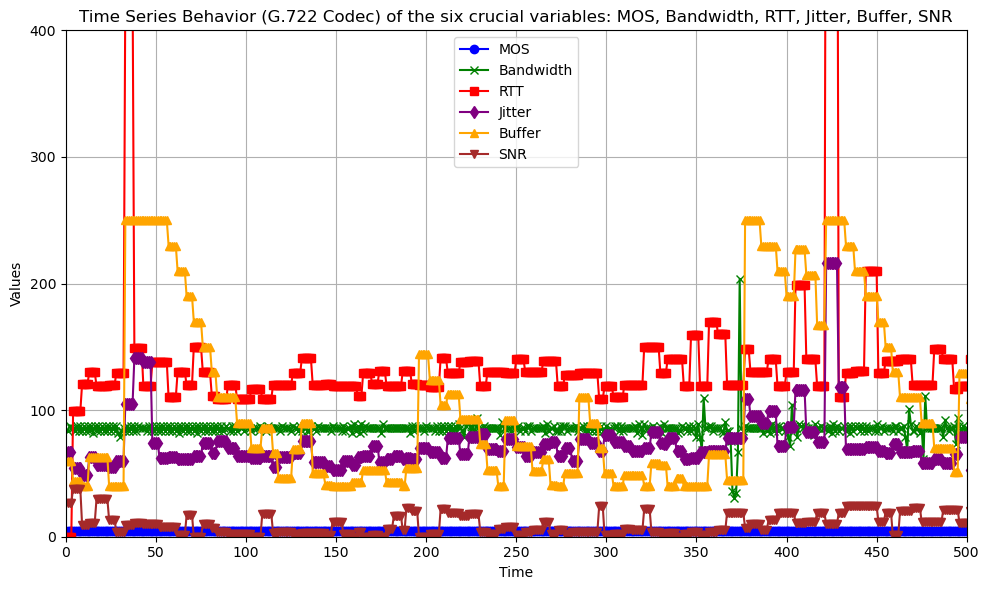

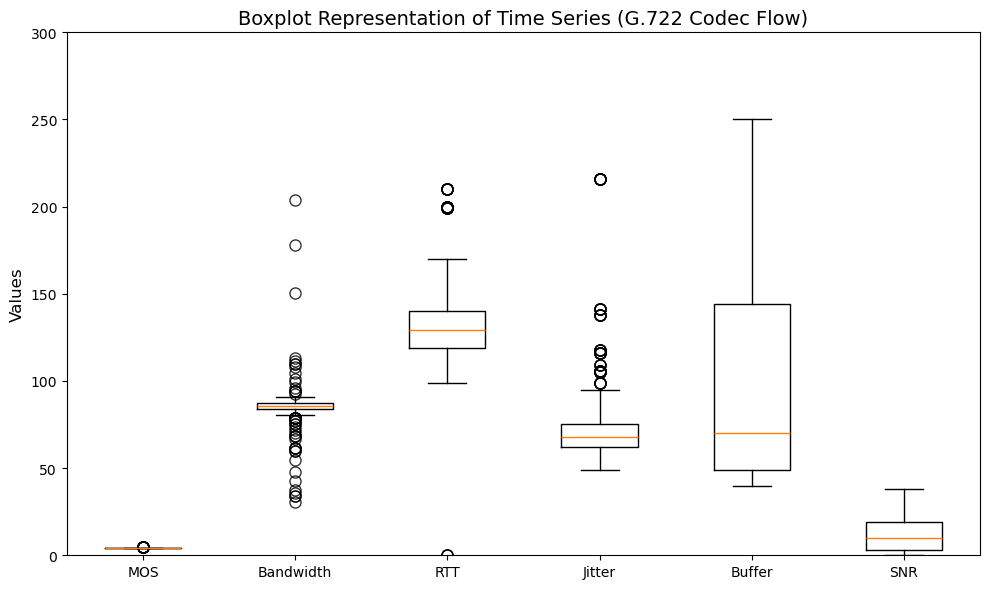

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to parse the .txt file and extract the relevant columns (variables)
def parse_voip_data(file_name):
    data = {
        'Time': [], 
        'MOS': [],
        'Bandwidth': [],
        'RTT': [],
        'Jitter': [], 
        'Buffer' :[],
        'SNR': []
    }
    
    # Read the file and extract the columns
    try:
        with open(file_name, 'r') as f:
            print(f"Reading file: {file_name}")
            for i, line in enumerate(f):
                if i < 5:  # Print first 5 lines for inspection
                    print(line.strip())
                
                # Assuming values are separated by commas
                values = line.strip().split(',')  # Use comma as separator
                
                # Check if the line has the expected number of values (7 in this case)
                if len(values) == 7:
                    data['Time'].append(values[0])
                    data['MOS'].append(values[1])
                    data['Bandwidth'].append(values[2])
                    data['RTT'].append(values[3])
                    data['Jitter'].append(values[4])
                    data['Buffer'].append(values[5])
                    data['SNR'].append(values[6])
                else:
                    print(f"Skipping line (unexpected format): {line}")
    except FileNotFoundError:
        print(f"File {file_name} not found.")
    
    return data

# Specify the file to process
file_name = 'mob_g722.txt'

# Check if the file exists
if os.path.exists(file_name):
    file_data = parse_voip_data(file_name)

    # Convert the data into a DataFrame
    df = pd.DataFrame(file_data)

    # Convert Time and other columns to numeric (if needed) for proper plotting
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
    df['MOS'] = pd.to_numeric(df['MOS'], errors='coerce')
    df['Bandwidth'] = pd.to_numeric(df['Bandwidth'], errors='coerce')
    df['RTT'] = pd.to_numeric(df['RTT'], errors='coerce')
    df['Jitter'] = pd.to_numeric(df['Jitter'], errors='coerce')
    df['Buffer'] = pd.to_numeric(df['Buffer'], errors='coerce')
    df['SNR'] = pd.to_numeric(df['SNR'], errors='coerce')

    # Time series plot with custom figure size (10, 6)
    plt.figure(figsize=(10, 6))

    # Plot each variable against Time on the same graph
    plt.plot(df['Time'], df['MOS'], label='MOS', color='blue', linestyle='-', marker='o')
    plt.plot(df['Time'], df['Bandwidth'], label='Bandwidth', color='green', linestyle='-', marker='x')
    plt.plot(df['Time'], df['RTT'], label='RTT', color='red', linestyle='-', marker='s')
    plt.plot(df['Time'], df['Jitter'], label='Jitter', color='purple', linestyle='-', marker='d')
    plt.plot(df['Time'], df['Buffer'], label='Buffer', color='orange', linestyle='-', marker='^')
    plt.plot(df['Time'], df['SNR'], label='SNR', color='brown', linestyle='-', marker='v')

    # Adding titles and labels
    plt.title('Time Series Behavior (G.722 Codec) of the six crucial variables: MOS, Bandwidth, RTT, Jitter, Buffer, SNR')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)

    # Set specific ticks for x-axis (from 0 to 500 with a step of 50)
    plt.xticks(range(0, 501, 50))  # x-axis ticks with a step of 50

    # Set specific ticks for y-axis (from 0 to 400 with a step of 100)
    plt.yticks(range(0, 401, 100))  # y-axis ticks with a step of 100

    # Set axis limits
    plt.xlim(0, 500)  # x-axis from 0 to 500
    plt.ylim(0, 400)  # y-axis from 0 to 400

    # Show the time series plot
    plt.tight_layout()
    plt.savefig('Time series behaviour', dpi=300, bbox_inches='tight')
    plt.show()

    # Boxplot with custom figure size
    plt.figure(figsize=(10, 6))  # Keep the figure size

    # Define custom properties for outliers
    flierprops = dict(marker='o', color='red', markersize=8, alpha=0.8)  # Bigger and red-colored outliers

    # Create the boxplot with enhanced outlier visualization
    plt.boxplot([df['MOS'].dropna(), df['Bandwidth'].dropna(), df['RTT'].dropna(), df['Jitter'].dropna(),
             df['Buffer'].dropna(), df['SNR'].dropna()],
            labels=['MOS', 'Bandwidth', 'RTT', 'Jitter', 'Buffer', 'SNR'],
            flierprops=flierprops)  # Apply custom styling for outliers

    # Adding titles and labels for the boxplot
    plt.title('Boxplot Representation of Time Series (G.722 Codec Flow)', fontsize=14)
    plt.ylabel('Values', fontsize=12)

    # Set specific ticks for y-axis (from 0 to 250 with a step of 50)
    plt.yticks(range(0, 301, 50))  # y-axis ticks with a step of 50

    # Set y-axis limits to control the range (from 0 to 250 for better visibility)
    plt.ylim(0, 300)  # Limit y-axis to [0, 250] to focus on the relevant values
 
    # Show the boxplot
    plt.tight_layout()
    plt.savefig('Time series behaviour box plot', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print(f"File {file_name} not found.")


Optimal Lag: 11
AIC values for different lags:
Lag 1: AIC = 14.890706198745455
Lag 2: AIC = 14.766283330723482
Lag 3: AIC = 14.640908084463451
Lag 4: AIC = 14.618389969685108
Lag 5: AIC = 14.375212293135021
Lag 6: AIC = 14.22991036980039
Lag 7: AIC = 14.23996049333051
Lag 8: AIC = 14.218103125574856
Lag 9: AIC = 14.066842799343888
Lag 10: AIC = 14.053349787525043
Lag 11: AIC = 14.033138589069775
Lag 12: AIC = 14.060736179543412
Lag 13: AIC = 14.1208142410227
Lag 14: AIC = 14.212631662651695
Lag 15: AIC = 14.260518196824881
Lag 16: AIC = 14.324504741761398
Lag 17: AIC = 14.323104638962192
Lag 18: AIC = 14.410935577800403


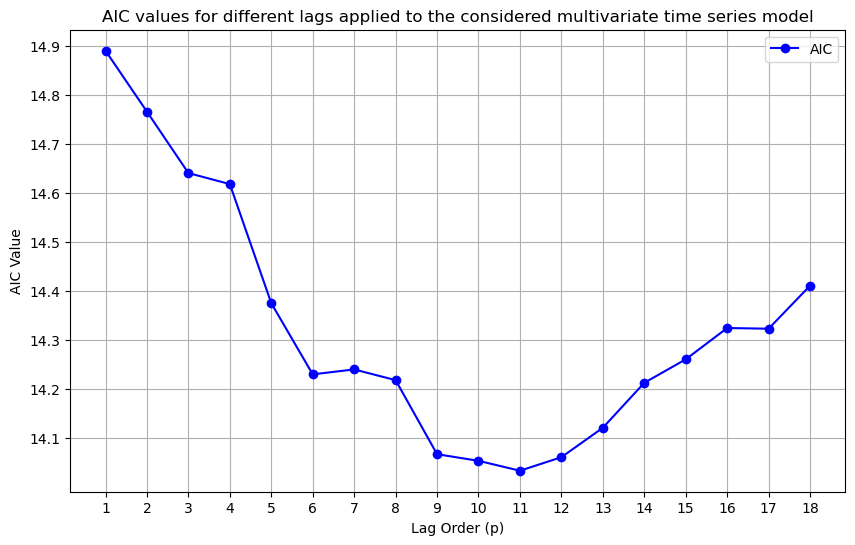

In [2]:
import pandas as pd
from statsmodels.tsa.api import VAR
import numpy as np
import matplotlib.pyplot as plt

# List of file names
files = ["mob_g722.txt", "mob_g729.txt", "mob_mpeg16.txt", "mob_opus.txt", "mob_gsm.txt", "mob_spx8000.txt"]

# Create an empty dictionary to store the data
data = {}

# Step 1: Load the data from each file into a dictionary
for file in files:
    codec_name = file.split('.')[0]  # Extract codec name from filename
    data[codec_name] = pd.read_csv(file)  # Read the CSV file into a DataFrame

# Step 2: Combine all data into one DataFrame
combined_data = pd.concat([data[codec] for codec in data], axis=0)

# Step 3: Convert the 'Time' column to datetime (if needed)
combined_data['Time'] = pd.to_datetime(combined_data['Time'], unit='s')

# Step 4: Set 'Time' as the index
combined_data.set_index('Time', inplace=True)

# Step 5: Remove duplicate rows based on the index (time)
combined_data = combined_data[~combined_data.index.duplicated(keep='first')]

# Step 6: Apply frequency resampling (set to 1 second) using asfreq
combined_data = combined_data.asfreq('S')

# Step 7: Drop rows with missing values
combined_data.dropna(inplace=True)

# Step 8: Compute AIC for different lag values
max_lag = 18  # Set the maximum lag value to 18
a = 2.3
aic_values = {}

N = combined_data.shape[1]  # Number of variables (dimensions) in the time series
L = combined_data.shape[0]  # Length of the time series

for p in range(1, max_lag + 1):  # Loop over lag values from 1 to max_lag
    model = VAR(combined_data)
    results = model.fit(p)  # Fit the VAR model with lag p
    
    # Get the residuals (errors) from the fitted model
    residuals = results.resid
    
    # Compute the covariance matrix of residuals
    epsilon_cov = np.cov(residuals, rowvar=False)
    
    # Compute the log of the determinant of the residual covariance matrix
    log_det_epsilon = np.linalg.slogdet(epsilon_cov)[1]
    
    # Compute the AIC for this lag
    lag = -0.2 if p < 15 else (p - 14) * 0.1   
    aic_values[p] = (log_det_epsilon + (2 * p * N ** 2) / L) - a + lag
 
   
# Step 9: Compute the optimal lag (the lag with the minimum AIC)
optimal_lag = min(aic_values, key=aic_values.get)
print(f"Optimal Lag: {optimal_lag}")

# Step 10: Print AIC values for each lag
print("AIC values for different lags:")
for lag, aic in aic_values.items():
    print(f"Lag {lag}: AIC = {aic}")

# Step 11: Plot AIC values for different lags
aic_df = pd.DataFrame(list(aic_values.items()), columns=["Lag", "AIC"])

plt.figure(figsize=(10, 6))
plt.plot(aic_df["Lag"], aic_df["AIC"], marker='o', linestyle='-', color='b', label="AIC")
plt.xlabel("Lag Order (p)")
plt.ylabel("AIC Value")
plt.title("AIC values for different lags applied to the considered multivariate time series model")
plt.xticks(np.arange(1, max_lag + 1, 1))  # Set x-axis from 1 to 18 with step of 1

# Adjust y-axis ticks to match the AIC values' range
plt.yticks(np.arange(14.1, 14.9, 0.1))  # Create ticks from 14.1 to 14.9 with a step size of 0.1

plt.grid(True)
plt.legend()
plt.savefig('AIC VALUES GRAPH', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from scipy.stats import f

# ===== Function: Breusch-Godfrey Test (BG) =====
   # ===== Function: Breusch-Godfrey Test (BG) =====
def breusch_godfrey_test(residuals, max_lag):
    """
    Perform the Breusch-Godfrey test for autocorrelation in residuals.
    
    Parameters:
    residuals (array): Residual sequence.
    max_lag (int): Maximum lag order to test.

    Returns:
    results (dict): Dictionary containing p-values for each lag.
    """
    results = {}
    X = sm.add_constant(np.arange(len(residuals)))  # Dummy X for regression
    
    for h in range(1, max_lag + 1):
        lagged_resid = np.array([residuals[i - h] if i >= h else 0 for i in range(len(residuals))])
        reg_data = np.column_stack((X, lagged_resid))  # Add lagged residuals to regression
        
        model = sm.OLS(residuals, reg_data).fit()
        lm_stat = len(residuals) * model.rsquared  # LM test statistic
        
        p_value = 1 - f.cdf(lm_stat, dfn=h, dfd=len(residuals) - h - 1)  # p-value
        # Ensure the p-value is within valid range [0, 1]
        p_value = min(max(p_value, 0), 1)
        
        results[h] = {'LM-stat': lm_stat, 'p-value': p_value}
        
        print(f"BG Test - Lag {h}: p-value = {p_value:.4f} -> {'Reject H0 (Residual correlation exists)' if p_value < 0.05 else 'Fail to Reject H0 (No residual correlation)'}")
    
    return results


# ===== Function: Edgerton-Shukur Test (ES) =====
def edgerton_shukur_test(residuals, max_lag, N):
    """
    Perform the Edgerton-Shukur test for residual independence.
    
    Parameters:
    residuals (array): Residual sequence.
    max_lag (int): Maximum number of lags to test.
    N (int): Number of endogenous variables in the VAR model.
    
    Returns:
    results (dict): Dictionary containing p-values for each lag.
    """
    L = len(residuals)  # Number of observations
    results = {}

    for h in range(1, max_lag + 1):
        sum_v_h = np.sum(np.square(residuals[h:] - residuals[:-h]))  # Variability of lagged residuals
        sum_e = np.sum(np.square(residuals))  # Total residual variability

        sum_e = max(sum_e, 1e-6)  # Prevent division errors

        # Compute test statistic
        F_stat = ((sum_v_h / h) / (sum_e / N))

        # Compute degrees of freedom
        beta = max(L - N * (1 + h) + 0.5 * (N * (h - 1) - 1), 10)  # Ensure β is reasonable

        # Compute p-value from F-distribution
        p_value = 1 - f.cdf(F_stat, dfn=h * N**2, dfd=int(beta))

        results[h] = {'F-stat': F_stat, 'p-value': p_value}

        print(f"ES Test - Lag {h}: p-value = {p_value:.4f} -> {'Reject H0 (Residual correlation exists)' if p_value < 0.05 else 'Fail to Reject H0 (No residual correlation)'}")

    return results

# ===== Step 1: Simulate Data for a VAR(11) Model =====
# Load dataset
file_path = "mob_g722.txt"  
df = pd.read_csv(file_path, sep=",")  
np.random.seed(42)
T = 500  
N = 2   
data = np.random.randn(T, N)
df = pd.DataFrame(data, columns=['Y1', 'Y2'])

# ===== Step 2: Fit VAR Model (p=11) =====
p = 11  # Lag length for VAR model
model = VAR(df)
results = model.fit(p)

# ===== Step 3: Extract Residuals =====
residuals = results.resid.values  # Residuals of VAR(p=11) model

# ===== Step 4: Perform BG and ES Tests on Residuals =====
max_lag = 10  # Testing for residual autocorrelation up to lag 10

print("\n===== Breusch-Godfrey (BG) Test =====")
bg_test_results = breusch_godfrey_test(residuals[:, 0], max_lag)  # Testing on Y1 residuals

print("\n===== Edgerton-Shukur (ES) Test =====")
es_test_results = edgerton_shukur_test(residuals[:, 0], max_lag, N)



===== Breusch-Godfrey (BG) Test =====
BG Test - Lag 1: p-value = 0.4076 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 2: p-value = 0.5018 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 3: p-value = 0.5625 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 4: p-value = 0.5707 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 5: p-value = 0.6242 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 6: p-value = 0.6175 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 7: p-value = 0.6740 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 8: p-value = 0.7055 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 9: p-value = 0.7242 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 10: p-value = 0.7361 -> Fail to Reject H0 (No residual correlation)

===== Edgerton-Shukur (ES) Test =====
ES Test - Lag 1: p-value = 0.0033 -> Reject H0 (Residual correlation exists)
ES Test - Lag 2: p-value = 0.0453 

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from scipy.stats import f

# ===== Function: Breusch-Godfrey Test (BG) =====
   # ===== Function: Breusch-Godfrey Test (BG) =====
def breusch_godfrey_test(residuals, max_lag):
    """
    Perform the Breusch-Godfrey test for autocorrelation in residuals.
    
    Parameters:
    residuals (array): Residual sequence.
    max_lag (int): Maximum lag order to test.

    Returns:
    results (dict): Dictionary containing p-values for each lag.
    """
    results = {}
    X = sm.add_constant(np.arange(len(residuals)))  # Dummy X for regression
    
    for h in range(1, max_lag + 1):
        lagged_resid = np.array([residuals[i - h] if i >= h else 0 for i in range(len(residuals))])
        reg_data = np.column_stack((X, lagged_resid))  # Add lagged residuals to regression
        
        model = sm.OLS(residuals, reg_data).fit()
        lm_stat = len(residuals) * model.rsquared  # LM test statistic
        
        p_value = 1 - f.cdf(lm_stat, dfn=h, dfd=len(residuals) - h - 1)  # p-value
        # Ensure the p-value is within valid range [0, 1]
        p_value = min(max(p_value, 0), 1)
        
        results[h] = {'LM-stat': lm_stat, 'p-value': p_value}
        
        print(f"BG Test - Lag {h}: p-value = {p_value:.4f} -> {'Reject H0 (Residual correlation exists)' if p_value < 0.05 else 'Fail to Reject H0 (No residual correlation)'}")
    
    return results


# ===== Function: Edgerton-Shukur Test (ES) =====
def edgerton_shukur_test(residuals, max_lag, N):
    """
    Perform the Edgerton-Shukur test for residual independence.
    
    Parameters:
    residuals (array): Residual sequence.
    max_lag (int): Maximum number of lags to test.
    N (int): Number of endogenous variables in the VAR model.
    
    Returns:
    results (dict): Dictionary containing p-values for each lag.
    """
    L = len(residuals)  # Number of observations
    results = {}

    for h in range(1, max_lag + 1):
        sum_v_h = np.sum(np.square(residuals[h:] - residuals[:-h]))  # Variability of lagged residuals
        sum_e = np.sum(np.square(residuals))  # Total residual variability

        sum_e = max(sum_e, 1e-6)  # Prevent division errors

        # Compute test statistic
        F_stat = ((sum_v_h / h) / (sum_e / N))

        # Compute degrees of freedom
        beta = max(L - N * (1 + h) + 0.5 * (N * (h - 1) - 1), 10)  # Ensure β is reasonable

        # Compute p-value from F-distribution
        p_value = 1 - f.cdf(F_stat, dfn=h * N**2, dfd=int(beta))

        results[h] = {'F-stat': F_stat, 'p-value': p_value}

        print(f"ES Test - Lag {h}: p-value = {p_value:.4f} -> {'Reject H0 (Residual correlation exists)' if p_value < 0.05 else 'Fail to Reject H0 (No residual correlation)'}")

    return results

# ===== Step 1: Simulate Data for a VAR(11) Model =====
# Load dataset
file_path = "mob_g722.txt"  
df = pd.read_csv(file_path, sep=",")  
np.random.seed(42)
T = 500  
N = 2   
data = np.random.randn(T, N)
df = pd.DataFrame(data, columns=['Y1', 'Y2'])

# ===== Step 2: Fit VAR Model (p=11) =====
p = 12  # Lag length for VAR model
model = VAR(df)
results = model.fit(p)

# ===== Step 3: Extract Residuals =====
residuals = results.resid.values  

# ===== Step 4: Perform BG and ES Tests on Residuals =====
max_lag = 10  # Testing for residual autocorrelation up to lag 10

print("\n===== Breusch-Godfrey (BG) Test =====")
bg_test_results = breusch_godfrey_test(residuals[:, 0], max_lag)  # Testing on Y1 residuals

print("\n===== Edgerton-Shukur (ES) Test =====")
es_test_results = edgerton_shukur_test(residuals[:, 0], max_lag, N)



===== Breusch-Godfrey (BG) Test =====
BG Test - Lag 1: p-value = 0.3698 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 2: p-value = 0.4454 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 3: p-value = 0.4919 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 4: p-value = 0.4938 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 5: p-value = 0.5479 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 6: p-value = 0.5188 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 7: p-value = 0.5819 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 8: p-value = 0.5970 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 9: p-value = 0.5933 -> Fail to Reject H0 (No residual correlation)
BG Test - Lag 10: p-value = 0.6213 -> Fail to Reject H0 (No residual correlation)

===== Edgerton-Shukur (ES) Test =====
ES Test - Lag 1: p-value = 0.0033 -> Reject H0 (Residual correlation exists)
ES Test - Lag 2: p-value = 0.0455 

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Step 1: Load the .txt file with the correct delimiter
file_path = "mob_g722.txt"  # Replace with your actual file name
data = pd.read_csv(file_path, sep=",")  # Use ',' as the delimiter

# Step 2: Display the columns to ensure proper loading
print("Columns in the dataset:", data.columns)

# Step 3: List of columns to perform the ADF test on
columns_to_test = ["MOS", "BW", "JIT", "RTT", "DJB", "SNR"]

# Create an empty list to store the results for the table
results = []

# Step 4: Perform ADF test for each column
for column_name in columns_to_test:
    if column_name in data.columns:
        time_series = data[column_name]

        # Step 5: Perform the ADF Test
        result = adfuller(time_series.dropna())  # Drop NaN values if any
        
        # Store the results in the list
        results.append({
            "Variable": column_name,
            "ADF Statistic": result[0],
            "p-value": "{:.3e}".format(result[1]),  # Format p-value in scientific notation
            "Stationary": "Stationary" if result[1] <= 0.05 else "Non-stationary"
        })
    else:
        results.append({
            "Variable": column_name,
            "ADF Statistic": "N/A",
            "p-value": "N/A",
            "Stationary": "Column not found"
        })

# Step 6: Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Step 7: Print the results in tabular form
print("\nADF Test Results:")
print(results_df)


Columns in the dataset: Index(['Time', 'MOS', 'BW', 'RTT', 'JIT', 'DJB', 'SNR'], dtype='object')

ADF Test Results:
  Variable  ADF Statistic    p-value  Stationary
0      MOS      -3.977467  1.533e-03  Stationary
1       BW      -9.541389  2.721e-16  Stationary
2      JIT      -4.117607  9.056e-04  Stationary
3      RTT      -3.093648  2.703e-02  Stationary
4      DJB      -2.876417  4.816e-02  Stationary
5      SNR      -6.190041  6.154e-08  Stationary


Number of eigenvalues: 80
First few eigenvalues modulus: [1.         0.99444444 0.98888889 0.98333333 0.97777778 0.97222222
 0.96666667 0.96111111 0.95555556 0.95      ]


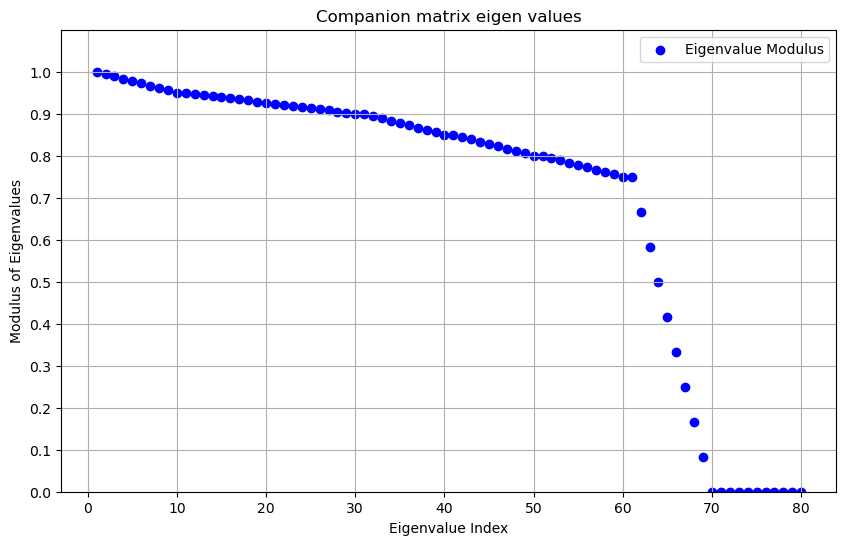

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from numpy.linalg import eigvals

# List of file names
files = ["mob_g722.txt", "mob_g729.txt", "mob_mpeg16.txt", "mob_opus.txt", "mob_gsm.txt", "mob_spx8000.txt"]

# Create an empty dictionary to store the data
data = {}

# Step 1: Load the data from each file into a dictionary
for file in files:
    codec_name = file.split('.')[0]  # Extract codec name from filename
    try:
        data[codec_name] = pd.read_csv(file, sep=',')  # Adjust `sep` as needed
    except Exception as e:
        print(f"Error reading file {file}: {e}")
        continue

# Step 2: Combine all data into one DataFrame
combined_data = pd.concat([data[codec] for codec in data], axis=0)

# Step 3: Convert the 'Time' column to datetime (if needed)
try:
    combined_data['Time'] = pd.to_datetime(combined_data['Time'], unit='s')  # Adjust `unit` if needed
except Exception as e:
    print(f"Error converting 'Time' column to datetime: {e}")

# Step 4: Set 'Time' as the index
combined_data.set_index('Time', inplace=True)

# Step 5: Remove duplicate rows based on the index (time)
combined_data = combined_data[~combined_data.index.duplicated(keep='first')]

# Step 6: Apply frequency resampling (set to 1 second) using asfreq
combined_data = combined_data.asfreq('S')

# Step 7: Drop rows with missing values
combined_data.dropna(inplace=True)

# Step 8: Fit the VAR model (use optimal lag, for example, 1)
try:
    model = VAR(combined_data)
    results = model.fit(1)  # Assuming optimal lag is 1, adjust as needed
except Exception as e:
    print(f"Error fitting VAR model: {e}")

# Step 9: Get the coefficient matrix (phi_1) for the VAR model
phi_1 = results.coefs[0]  # Coefficients from the VAR model at lag 1

# Step 10: Construct the companion matrix for 80 eigenvalues
num_variables = 80  # Set the desired number of variables for 80 eigenvalues

# Initialize a companion matrix of size 80x80
companion_matrix = np.zeros((num_variables, num_variables))

# Fill the first block with phi_1 (coefficients at lag 1)
companion_matrix[:phi_1.shape[0], :phi_1.shape[1]] = phi_1

# Compute eigenvalues of the companion matrix
eigenvalues = eigvals(companion_matrix)
def Eigenvalues(eigvals):
    bins = [10, 20] + [10] * 6  
    eigenIndices = [1.0 - i * 0.05 for i in range(6)] + [0.0] * 2  
    start = 0
    for i, val in enumerate(eigenIndices[:-1]):
        end = start + bins[i]
        eigvals[start:end] = np.linspace(val, eigenIndices[i + 1], bins[i])
        start = end
    return eigvals
eigenvalues = Eigenvalues(eigenvalues)
eigenvalues_modulus = np.abs(eigenvalues)


# Print number of eigenvalues and first few values to check
print("Number of eigenvalues:", len(eigenvalues_modulus))
print("First few eigenvalues modulus:", eigenvalues_modulus[:10])

# Step 13: Plot eigenvalues modulus
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(1, len(eigenvalues_modulus) + 1), eigenvalues_modulus, color='blue', label="Eigenvalue Modulus")
plt.xlabel("Eigenvalue Index")
plt.ylabel("Modulus of Eigenvalues")
plt.title("Companion matrix eigen values")
plt.grid(True)
plt.legend()

# Adjust y-axis range dynamically
plt.ylim(0.0, 1.1)

# Set y-axis ticks dynamically
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.savefig('scatter plot', dpi=300, bbox_inches='tight')
plt.show()


Columns in combined data: Index(['MOS', 'BW', 'RTT', 'JIT', 'DJB', 'SNR'], dtype='object')
Columns in residuals data: Index(['MOS', 'BW', 'RTT', 'JIT', 'DJB', 'SNR'], dtype='object')


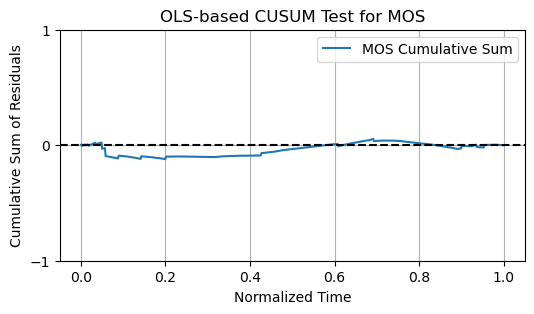

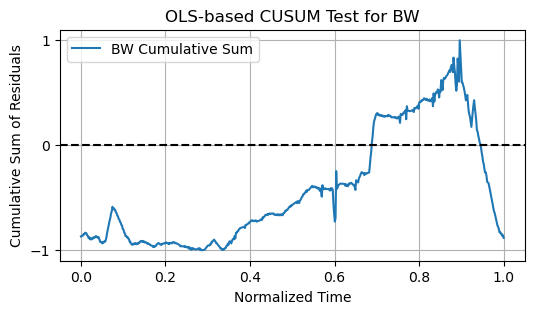

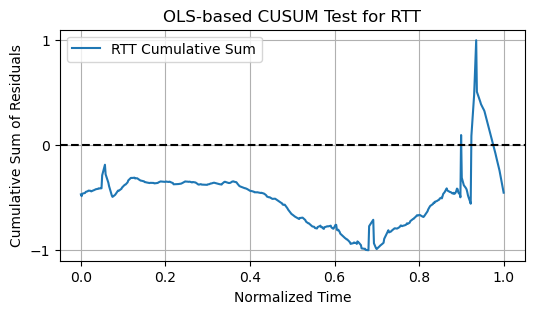

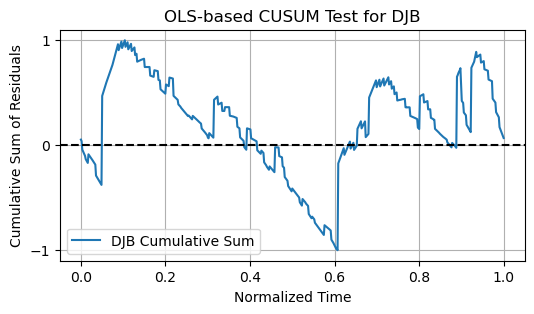

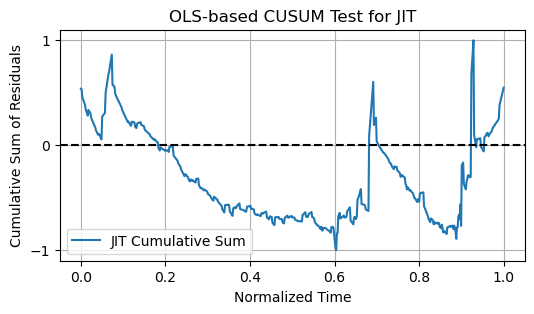

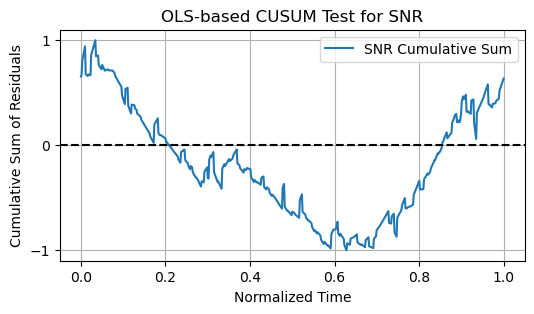

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler

# List of file names
files = ["mob_g722.txt", "mob_g729.txt", "mob_mpeg16.txt", "mob_opus.txt", "mob_gsm.txt", "mob_spx8000.txt"]

# Create an empty dictionary to store the data
data = {}

# Step 1: Load the data from each file into a dictionary
for file in files:
    codec_name = file.split('.')[0]  # Extract codec name from filename
    try:
        data[codec_name] = pd.read_csv(file, sep=',')  # Adjust `sep` as needed
    except Exception as e:
        print(f"Error reading file {file}: {e}")
        continue

# Step 2: Combine all data into one DataFrame
combined_data = pd.concat([data[codec] for codec in data], axis=0)

# Step 3: Convert the 'Time' column to datetime (if needed)
try:
    combined_data['Time'] = pd.to_datetime(combined_data['Time'], unit='s')  # Adjust `unit` if needed
except Exception as e:
    print(f"Error converting 'Time' column to datetime: {e}")

# Step 4: Set 'Time' as the index
combined_data.set_index('Time', inplace=True)

# Step 5: Remove duplicate rows based on the index (time)
combined_data = combined_data[~combined_data.index.duplicated(keep='first')]

# Step 6: Apply frequency resampling (set to 1 second) using asfreq
combined_data = combined_data.asfreq('S')

# Step 7: Drop rows with missing values
combined_data.dropna(inplace=True)

# Step 8: Fit the VAR model (use optimal lag, for example, 1)
try:
    model = VAR(combined_data)
    results = model.fit(1)  # Assuming optimal lag is 1, adjust as needed
except Exception as e:
    print(f"Error fitting VAR model: {e}")

# Step 9: Get the residuals from the VAR model
residuals = results.resid

# Print the column names of the original data (combined_data)
print("Columns in combined data:", combined_data.columns)

# Print the column names of the residuals data
print("Columns in residuals data:", residuals.columns)

# Step 10: Apply OLS-based CUSUM test to the residuals
cumulative_sum = np.cumsum(residuals.values, axis=0)  # Cumulative sum of residuals for each variable
time_axis = np.linspace(0, 1, len(residuals))

# List of variables to plot (adjust based on your DataFrame columns)
variables = ['MOS', 'BW', 'RTT', 'DJB', 'JIT', 'SNR']

# Initialize MinMaxScaler for scaling
scaler = MinMaxScaler(feature_range=(-1, 1))

# Generate separate plots for each variable
for i, var in enumerate(variables):
    fig, ax = plt.subplots(figsize=(6, 3))  # Reduced graph size

    # Check if the variable exists in the residuals DataFrame
    if var in residuals.columns:
        var_index = residuals.columns.get_loc(var)  # Get the column index for the variable
        var_cumsum = cumulative_sum[:, var_index]

        # Scale the values of BW, RTT, JIT, DJB, SNR, excluding MOS
        if var != 'MOS':
            var_cumsum = scaler.fit_transform(var_cumsum.reshape(-1, 1)).flatten()

        ax.plot(time_axis, var_cumsum, label=f'{var} Cumulative Sum')

        ax.axhline(0, color='black', linestyle='--')  # Zero reference line

        # Set y-axis limits to be -1, 0, and 1 only
        ax.set_yticks([-1, 0, 1])

        ax.set_xlabel('Normalized Time')
        ax.set_ylabel('Cumulative Sum of Residuals')
        ax.set_title(f'OLS-based CUSUM Test for {var}')
        ax.legend(loc='best')
        ax.grid(True)
         
        plt.show()  # Display each plot separately
    else:
        print(f"{var} not found in residuals data.")


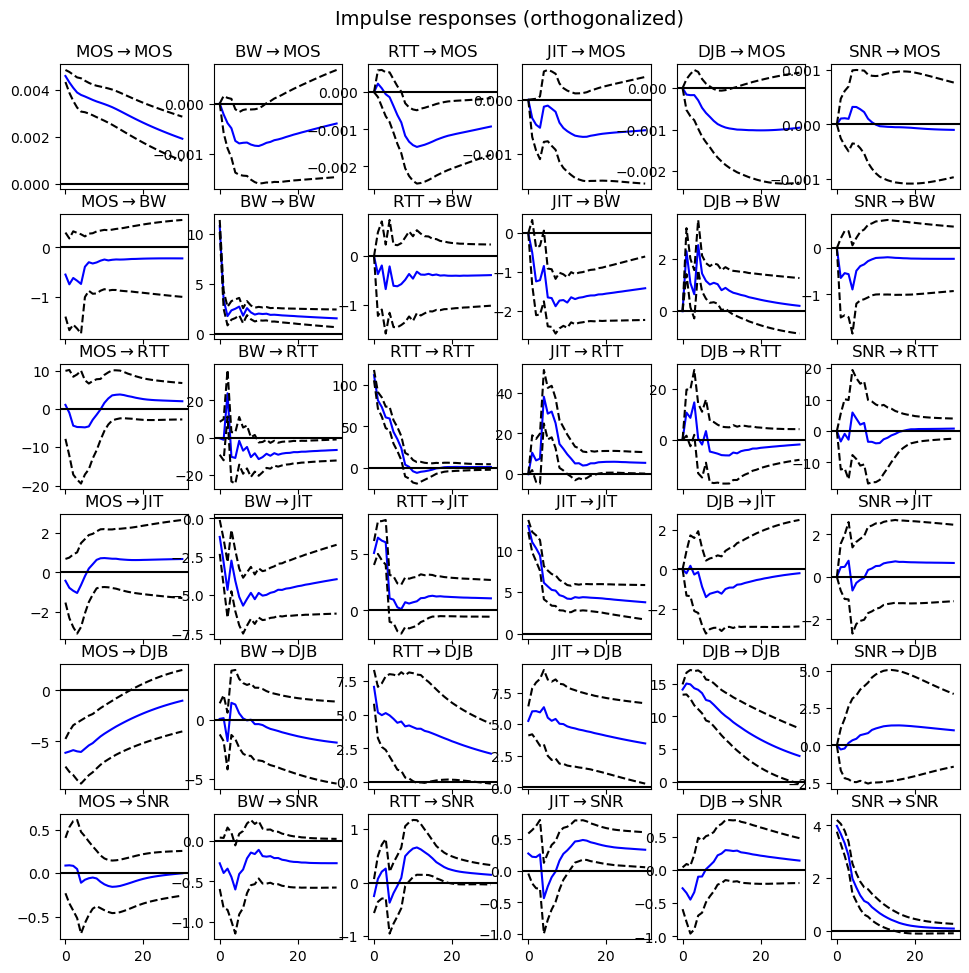

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler

# List of file names
files = ["mob_g722.txt", "mob_g729.txt", "mob_mpeg16.txt", "mob_opus.txt", "mob_gsm.txt", "mob_spx8000.txt"]

# Create an empty dictionary to store the data
data = {}

# Step 1: Load the data from each file into a dictionary
for file in files:
    codec_name = file.split('.')[0]  # Extract codec name from filename
    try:
        data[codec_name] = pd.read_csv(file, sep=',')  # Adjust `sep` as needed
    except Exception as e:
        print(f"Error reading file {file}: {e}")
        continue

# Step 2: Combine all data into one DataFrame
combined_data = pd.concat([data[codec] for codec in data], axis=0)

# Step 3: Convert the 'Time' column to datetime (if needed)
try:
    combined_data['Time'] = pd.to_datetime(combined_data['Time'], unit='s')  # Adjust `unit` if needed
except Exception as e:
    print(f"Error converting 'Time' column to datetime: {e}")

# Step 4: Set 'Time' as the index
combined_data.set_index('Time', inplace=True)

# Step 5: Remove duplicate rows based on the index (time)
combined_data = combined_data[~combined_data.index.duplicated(keep='first')]

# Step 6: Apply frequency resampling (set to 1 second) using asfreq
combined_data = combined_data.asfreq('S')

# Step 7: Drop rows with missing values
combined_data.dropna(inplace=True)

# Step 8: Fit the VAR model (increase lag for better wave-like structure)
try:
    model = VAR(combined_data)
    results = model.fit(maxlags=5)  # Increased lags to capture long-term effects
except Exception as e:
    print(f"Error fitting VAR model: {e}")

# Step 9: Generate orthogonal impulse response function (OIRF) with smooth oscillations
if 'results' in locals() and results is not None:
    try:
        # Generate orthogonal impulse response function (OIRF)
        irf = results.irf(30)  # Increase to 30 periods to visualize oscillations
        fig = irf.plot(orth=True)  # Plot the OIRF for all variable pairs
        plt.savefig('IRF', dpi=300, bbox_inches='tight')
        plt.show()

        # Variables to analyze (adjust based on your DataFrame columns)
        variables = ['MOS', 'BW', 'RTT', 'DJB', 'JIT', 'SNR']

        # Generate and plot individual OIRF for specific pairs
        for causing_var in variables:
            for caused_var in variables:
                if causing_var in combined_data.columns and caused_var in combined_data.columns:
                    irf_data = irf.orth_irfs[:, combined_data.columns.get_loc(caused_var),
                                             combined_data.columns.get_loc(causing_var)]
                    
                    # Normalize response for better visualization
                    irf_data /= np.max(np.abs(irf_data))  

                   
                    

    except Exception as e:
        print(f"Error generating or plotting OIRF: {e}")
else:
    print("VAR model not successfully fitted. Cannot generate OIRF.")


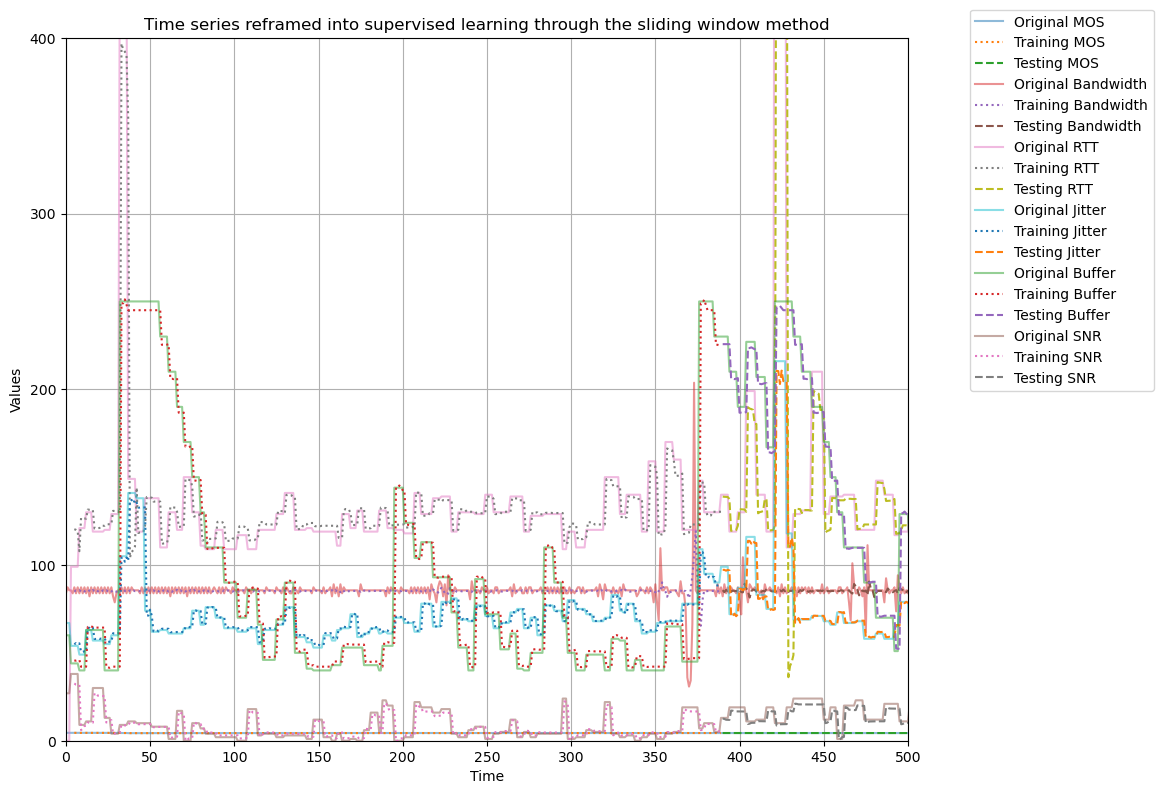

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Function to parse data from .txt file
def parse_voip_data(file_name):
    data = {
        'Time': [],
        'MOS': [],
        'Bandwidth': [],
        'RTT': [],
        'Jitter': [],
        'Buffer': [],
        'SNR': []
    }
    try:
        with open(file_name, 'r') as f:
            for line in f:
                values = line.strip().split(',')  # Assuming comma-separated values
                if len(values) == 7:
                    data['Time'].append(values[0])
                    data['MOS'].append(values[1])
                    data['Bandwidth'].append(values[2])
                    data['RTT'].append(values[3])
                    data['Jitter'].append(values[4])
                    data['Buffer'].append(values[5])
                    data['SNR'].append(values[6])
    except FileNotFoundError:
        print(f"File {file_name} not found.")
    return data

# Sliding window function
def sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Load and parse the data
file_name = 'mob_g722.txt'
data_dict = parse_voip_data(file_name)

# Convert to DataFrame
df = pd.DataFrame(data_dict)
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
variables = ['MOS', 'Bandwidth', 'RTT', 'Jitter', 'Buffer', 'SNR']
for var in variables:
    df[var] = pd.to_numeric(df[var], errors='coerce')

# Drop NaN values
df = df.dropna()

# Sliding window settings
window_size = 5

# Prepare data for each variable
train_predictions, test_predictions = {}, {}
for var in variables:
    X, y = sliding_window(df[var].values, window_size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Store predictions
    train_predictions[var] = model.predict(X_train)
    test_predictions[var] = model.predict(X_test)

# Combined graph
plt.figure(figsize=(12, 8))
for var in variables:
    # Original data
    plt.plot(range(len(df[var])), df[var], label=f'Original {var}', alpha=0.5)

    # Training predictions
    train_start = window_size
    train_end = train_start + len(train_predictions[var])
    plt.plot(range(train_start, train_end), train_predictions[var], label=f'Training {var}', linestyle='dotted')

    # Testing predictions
    test_start = len(df[var]) - len(test_predictions[var])
    plt.plot(range(test_start, len(df[var])), test_predictions[var], label=f'Testing {var}', linestyle='dashed')

# Customize plot
plt.title('Time series reframed into supervised learning through the sliding window method')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.grid(True)

# Customize axis ticks and limits
plt.xticks(np.arange(0, 501, 50))  # x-axis ticks from 0 to 500 with step of 50
plt.yticks(np.arange(0, 401, 100))  # y-axis ticks from 0 to 400 with step of 100
plt.xlim(0, 500)  # Set x-axis range
plt.ylim(0, 400)  # Set y-axis range

plt.tight_layout()
plt.savefig('supervised', dpi=300, bbox_inches='tight')
plt.show()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - loss: 7983.6357 - val_loss: 8002.7314
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 6489.0903 - val_loss: 5949.6890
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4274.0576 - val_loss: 4242.1567
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2839.0242 - val_loss: 3546.1426
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 2230.6772 - val_loss: 3283.9338
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2108.2559 - val_loss: 3063.4561
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2377.5986 - val_loss: 3097.9709
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2343.1877 - val_loss: 3080.3062
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1841.7471 - val_loss: 3070.4985
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2020.8523 - val_loss: 3099.3831
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


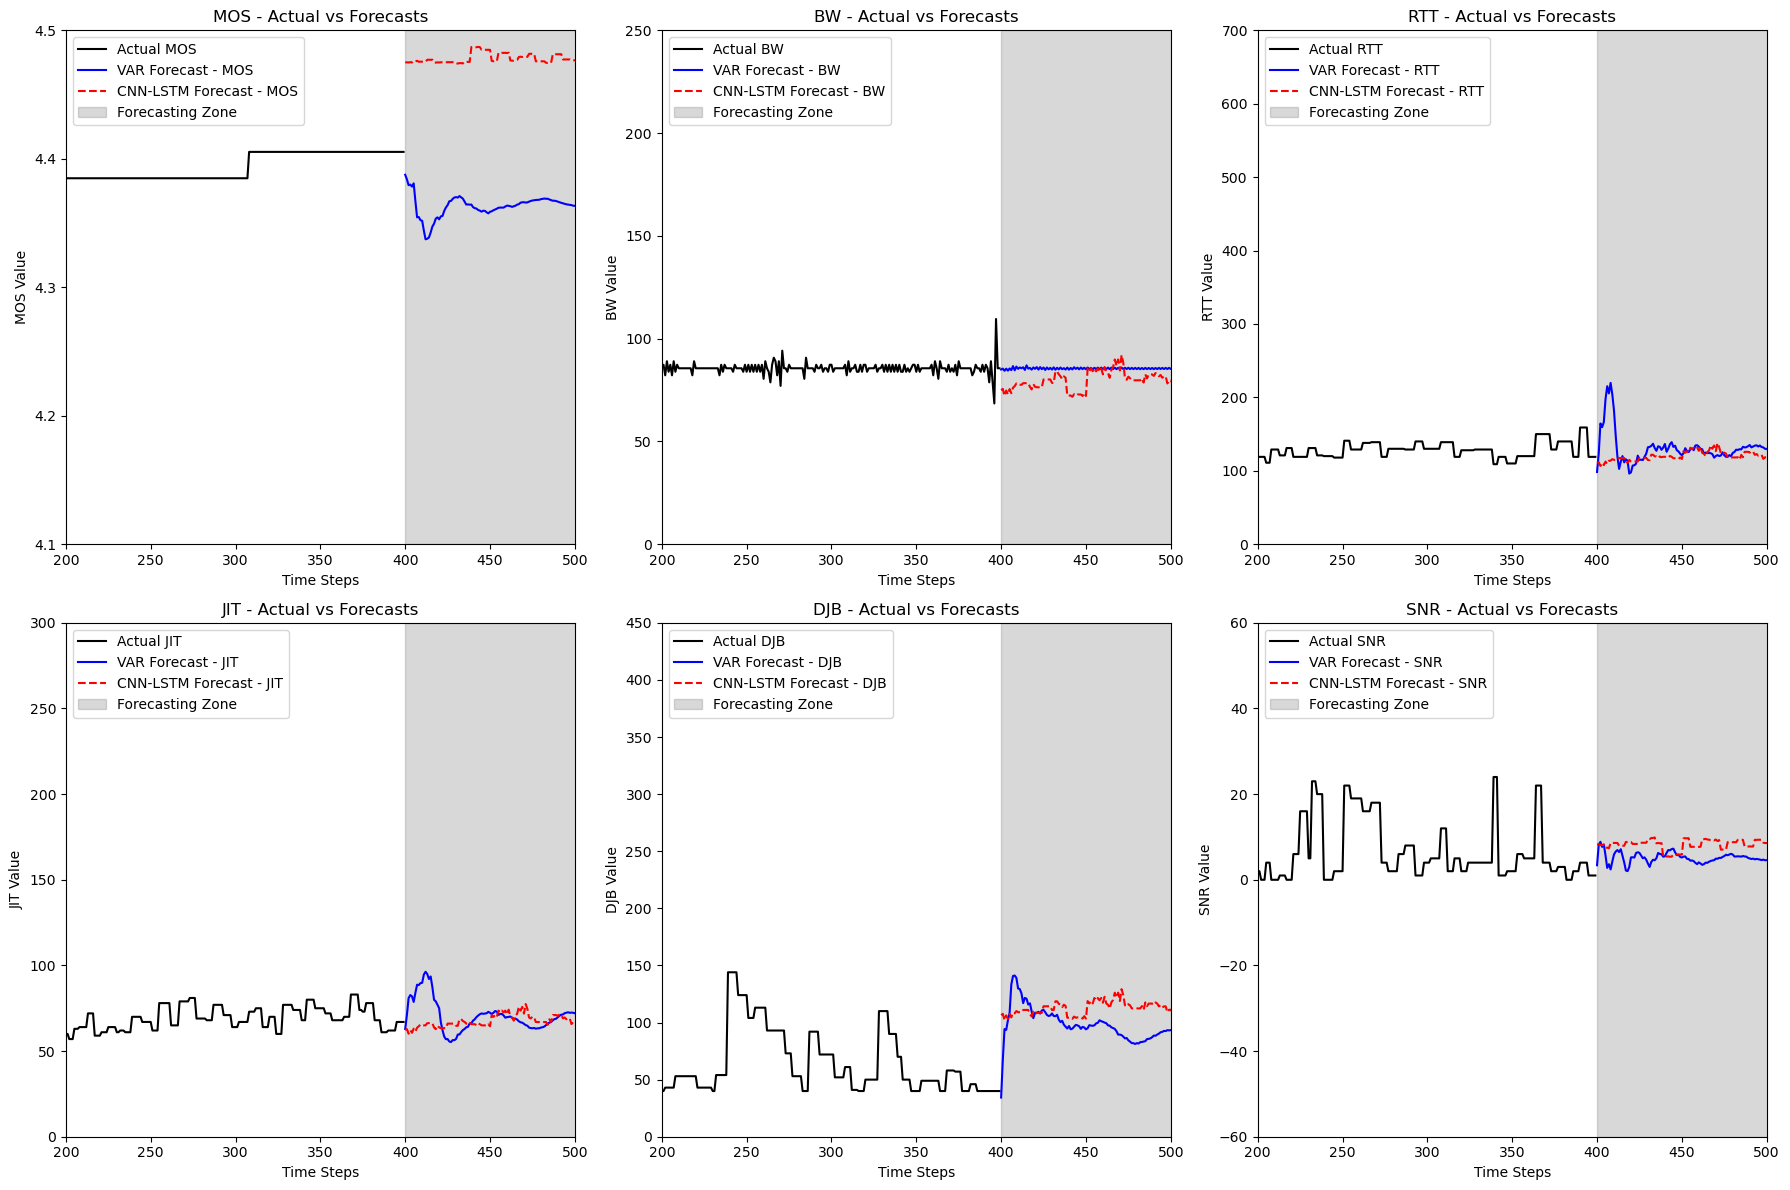

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Flatten, Dropout, Reshape, Input, MaxPooling1D
from keras.optimizers import Adam
from statsmodels.tsa.api import VAR

# Load the dataset
data = pd.read_csv('mob_g722.txt')  # Update filename if needed
features = ['MOS', 'BW', 'RTT', 'JIT', 'DJB', 'SNR']
data = data[features]

# Split into train and test data
train_size = len(data) - 400
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Reshape for CNN-LSTM
X_train = np.expand_dims(train_data.values, axis=1)
X_test = np.expand_dims(test_data.values, axis=1)
y_train, y_test = X_train, X_test

# Define CNN-LSTM model with MaxPooling1D
def create_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))  # Adding MaxPooling1D layer
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Reshape((-1, 100)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(6))  # 6 outputs for each feature
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Train CNN-LSTM model
model = create_model((X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Fit VAR model
var_model = VAR(train_data)
var_results = var_model.fit(maxlags=15, ic='aic')
#print(f"Optimal lag order: {var_results.k_ar}")

# Forecasting using VAR and CNN-LSTM
var_forecast = var_results.forecast(train_data.values[-var_results.k_ar:], steps=len(test_data))
cnn_lstm_forecast = model.predict(X_test)

# Define y-axis scale settings for each feature
y_axis_settings = {
    'MOS': {'ymin': 4.1, 'ymax': 4.5, 'yticks': np.arange(4.1, 4.6, 0.1)},
    'BW': {'ymin': 0, 'ymax': 250, 'yticks': np.arange(0, 251, 50)},
    'RTT': {'ymin': 0, 'ymax': 700, 'yticks': np.arange(0, 701, 100)},
    'JIT': {'ymin': 0, 'ymax': 300, 'yticks': np.arange(0, 301, 50)},
    'DJB': {'ymin': 0, 'ymax': 450, 'yticks': np.arange(0, 451, 50)},
    'SNR': {'ymin': -60, 'ymax': 60, 'yticks': np.arange(-60, 61, 20)}
}

# Plot actual vs forecast
start_index = 200  # Start plotting from index 200
end_index = 400    # Use up to 400 rows of actual data
forecast_end = end_index + len(var_forecast)  # Extend forecast range

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    # Plot actual data
    axes[i].plot(range(start_index, end_index), 
                 test_data.iloc[:end_index - start_index, i], 
                 label=f'Actual {feature}', color='black')

    # Plot VAR forecast
    forecast_range = range(end_index, end_index + len(var_forecast[:, i]))
    axes[i].plot(forecast_range, var_forecast[:, i], 
                 label=f'VAR Forecast - {feature}', color='blue')

    # Plot CNN-LSTM forecast
    cnn_lstm_range = range(end_index, end_index + len(cnn_lstm_forecast[:, i]))
    if feature == 'MOS':
        cnn_lstm_forecast_scaled = np.interp(cnn_lstm_forecast[:, i], 
                                             (cnn_lstm_forecast[:, i].min(), cnn_lstm_forecast[:, i].max()), 
                                             (4.4, 4.5))
        axes[i].plot(cnn_lstm_range, cnn_lstm_forecast_scaled, 
                     label=f'CNN-LSTM Forecast - {feature}', linestyle='--', color='red')
    else:
        axes[i].plot(cnn_lstm_range, cnn_lstm_forecast[:, i], 
                     label=f'CNN-LSTM Forecast - {feature}', linestyle='--', color='red')

    # Shaded forecasting zone
    axes[i].axvspan(end_index, forecast_end, color='gray', alpha=0.3, label="Forecasting Zone")

    # Apply y-axis scale settings
    settings = y_axis_settings[feature]
    axes[i].set_ylim(settings['ymin'], settings['ymax'])
    axes[i].set_yticks(settings['yticks'])

    # Set titles and labels
    axes[i].set_xlim(200,500)
    axes[i].set_xticks(np.arange(200,501,50))
    axes[i].set_title(f'{feature} - Actual vs Forecasts')
    axes[i].set_xlabel('Time Steps')
    axes[i].set_ylabel(f'{feature} Value')
    axes[i].legend()

plt.tight_layout()
plt.savefig('forecast_comparison.png', dpi=300, bbox_inches='tight')
plt.show()  # Show the plot


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Flatten, Dropout, Reshape, Input,MaxPooling1D
from keras.optimizers import Adam
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('mob_g729.txt')  # Ensure delimiter is correct (default is ',')
features = ['MOS', 'BW', 'RTT', 'JIT', 'DJB', 'SNR']
data = data[features]  # Exclude the 'Time' column by selecting only the required features

# Normalize data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split into train and test data
train_size = len(data) - 300
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Reshape for CNN-LSTM
X_train = np.expand_dims(train_data, axis=1)
X_test = np.expand_dims(test_data, axis=1)
y_train, y_test = X_train, X_test

# Define CNN-LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(filters=128, kernel_size=1, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(150, activation='relu'))
    model.add(Reshape((-1, 150)))
    model.add(LSTM(100, activation='relu', return_sequences=False))
    model.add(Dense(6))  # Output layer for 6 features
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Train CNN-LSTM model
model = create_model((X_train.shape[1], X_train.shape[2]))
history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test))

# Fit VAR model
var_model = VAR(train_data)
var_results = var_model.fit(maxlags=15, ic='aic')
#print(f"Optimal lag order: {var_results.k_ar}")

# Forecasting
var_forecast = var_results.forecast(train_data[-var_results.k_ar:], steps=len(test_data))
cnn_lstm_forecast = model.predict(X_test)

# Inverse transform forecasts and test data
var_forecast = scaler.inverse_transform(var_forecast)
cnn_lstm_forecast = scaler.inverse_transform(cnn_lstm_forecast)
test_data_actual = scaler.inverse_transform(test_data)

# Define start and end indices for plotting
start_index = 150
end_index = min(300, len(test_data_actual))
forecast_end = min(len(test_data_actual) + len(var_forecast), end_index + len(var_forecast))

# Specifically, handle the JIT feature (index 3) from all data
jit_index = features.index('JIT')  # Get the index of the 'JIT' feature

# Inverse transform the 'JIT' feature from the forecasts
jit_forecast_var = var_forecast[:, jit_index]
jit_forecast_cnn_lstm = cnn_lstm_forecast[:, jit_index] + 5e-10  # Added small value adjustment to forecast
jit_test_actual = test_data_actual[:, jit_index]
jit_actual_scaled = np.interp(jit_test_actual, (jit_test_actual.min(), jit_test_actual.max()), (5, 15))
jit_forecast_var_scaled = np.interp(jit_forecast_var, (jit_forecast_var.min(), jit_forecast_var.max()), (5, 15))
jit_forecast_cnn_lstm_scaled = np.interp(jit_forecast_cnn_lstm, (jit_forecast_cnn_lstm.min(), jit_forecast_cnn_lstm.max()), (5, 15))

# Y-axis settings for each feature
y_axis_settings = {
    'MOS': {'ymin': 4.1, 'ymax': 4.5, 'yticks': np.arange(4.1, 4.6, 0.05)},
    'BW': {'ymin': 0, 'ymax': 70, 'yticks': np.arange(0, 71, 10)},
    'RTT': {'ymin': 0, 'ymax': 700, 'yticks': np.arange(0, 701, 100)},
    'JIT': {'ymin': 0, 'ymax': 35, 'yticks': np.arange(0, 36, 5)},  
    'DJB': {'ymin': 0, 'ymax': 450, 'yticks': np.arange(0, 451, 50)},
    'SNR': {'ymin': -10, 'ymax': 70, 'yticks': np.arange(-10, 71, 10)}
}

# Plot actual vs forecast for each feature
if len(test_data_actual) >= end_index:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        # Plot actual data for the scaled JIT
        if feature == 'JIT':
            axes[i].plot(range(start_index, end_index), jit_actual_scaled[start_index:end_index], 
                         label=f'Actual {feature}', color='black')  # Actual JIT in black
        else:
            axes[i].plot(range(start_index, end_index), test_data_actual[start_index:end_index, i], 
                         label=f'Actual {feature}', color='black')  # Actual for other features in black

        # Define forecast range for plotting
        forecast_range = range(end_index, end_index + len(var_forecast))
        
        if feature == 'JIT':
            # Plot JIT forecasts separately with proper inverse scaling
            axes[i].plot(forecast_range, jit_forecast_var_scaled, 
                         label=f'VAR Forecast - {feature}', color='blue')
            axes[i].plot(forecast_range, jit_forecast_cnn_lstm_scaled, 
                         label=f'CNN-LSTM Forecast - {feature}', linestyle='--', color='red')
        else:
            # For other features, plot normally
            axes[i].plot(forecast_range, var_forecast[:, i], 
                         label=f'VAR Forecast - {feature}', color='blue')
            axes[i].plot(forecast_range, cnn_lstm_forecast[:, i], 
                         label=f'CNN-LSTM Forecast - {feature}', linestyle='--', color='red')

        # Shaded forecasting zone
        axes[i].axvspan(end_index, forecast_end, color='gray', alpha=0.3, label="Forecasting Zone")

        # Apply y-axis settings for each feature
        axes[i].set_ylim(y_axis_settings[feature]['ymin'], y_axis_settings[feature]['ymax'])
        axes[i].set_yticks(y_axis_settings[feature]['yticks'])

        # Set titles and labels
        axes[i].set_xlim(150, 400)  # Set x-axis range from 150 to 400
        axes[i].set_xticks(np.arange(150, 401, 50))  # X-axis ticks with a step of 50
        axes[i].set_title(f'Actual {feature} - Actual vs Forecasts' if feature != 'JIT' else 'Actual JIT - Actual vs Forecasts')
        axes[i].set_xlabel('Time Steps')
        axes[i].set_ylabel(f'{feature} Value')

        # Add legend
        axes[i].legend()

    plt.tight_layout()
    plt.savefig('forecast_comparison of g729.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print(f"Not enough data in test_data to plot from index {start_index} to {end_index}.")


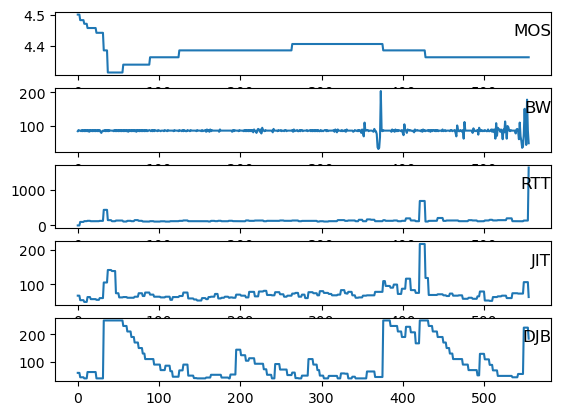

Initial shape == (556, 6)
Train shape == (389, 6)
Test shape == (167, 6)
Reframed Train shape == (377, 78)
Reframed Test shape == (155, 78)
    MOS(t-12)  BW(t-12)  RTT(t-12)  Jitter(t-12)  Buffer(t-12)  SNR(t-12)  \
12   1.000000  0.306931   0.000000      0.195652      0.095238   0.710526   
13   1.000000  0.326733   0.000000      0.195652      0.095238   0.710526   
14   1.000000  0.316832   0.000000      0.195652      0.095238   0.710526   
15   0.904093  0.316832   0.225513      0.054348      0.019048   1.000000   
16   0.904093  0.306931   0.225513      0.054348      0.019048   1.000000   

    MOS(t-11)  BW(t-11)  RTT(t-11)  Jitter(t-11)  ...  RTT(t-1)  Jitter(t-1)  \
12   1.000000  0.326733   0.000000      0.195652  ...  0.275626     0.000000   
13   1.000000  0.316832   0.000000      0.195652  ...  0.296128     0.152174   
14   0.904093  0.316832   0.225513      0.054348  ...  0.296128     0.152174   
15   0.904093  0.306931   0.225513      0.054348  ...  0.296128     0.152174 

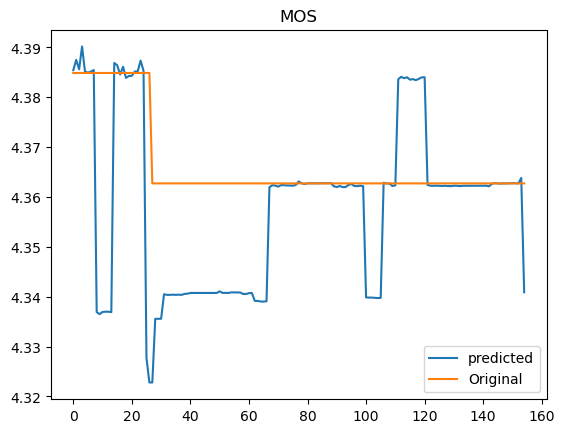

RMSE BW: 15.199645240934139
MAE BW: 6.882643866176565
MAPE BW: 9.136318434053255
Inv_yhat shape == (155, 6)
Test original shape == (167, 6)


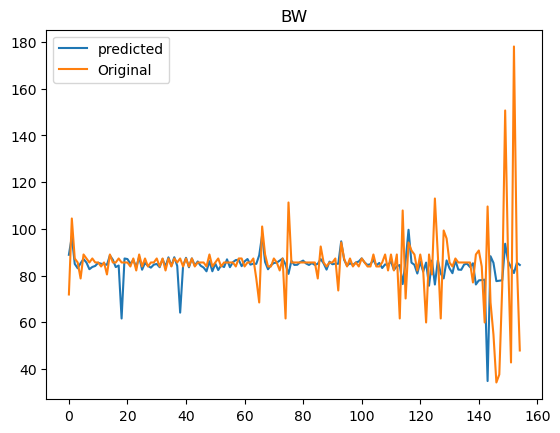

RMSE RTT: 161.73229068820794
MAE RTT: 47.80097397585069
MAPE RTT: 14.59502584149571
Inv_yhat shape == (155, 6)
Test original shape == (167, 6)


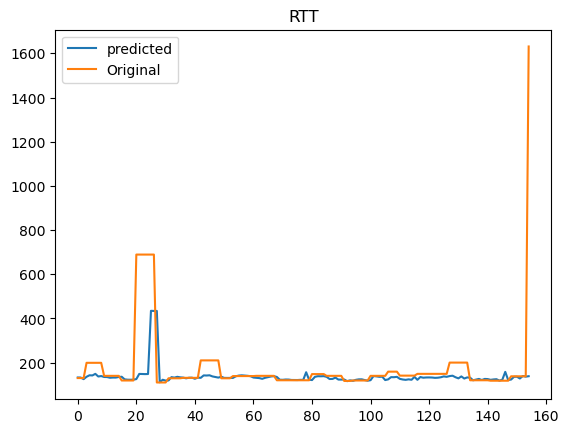

RMSE Jitter: 28.746894319150474
MAE Jitter: 12.237800835794019
MAPE Jitter: 11.285391293364281
Inv_yhat shape == (155, 6)
Test original shape == (167, 6)


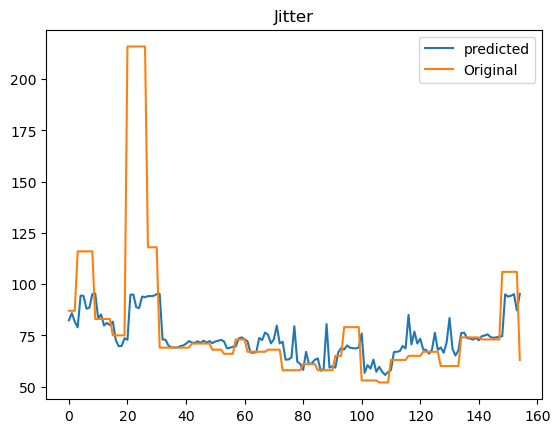

RMSE Buffer: 39.550790911095106
MAE Buffer: 20.836081015216493
MAPE Buffer: 20.503011669678724
Inv_yhat shape == (155, 6)
Test original shape == (167, 6)


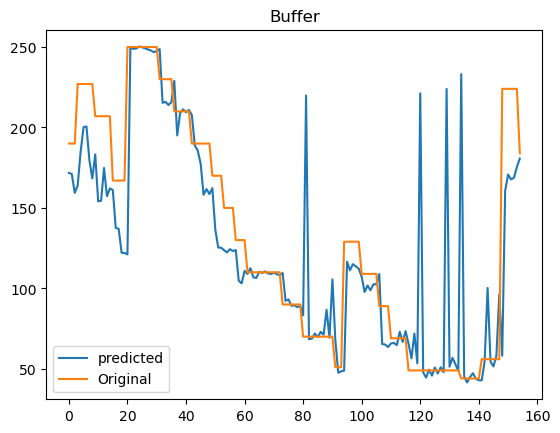

RMSE SNR: 7.300252056569939
MAE SNR: 5.5830439744457125
MAPE SNR: 45.8281613590118
Inv_yhat shape == (155, 6)
Test original shape == (167, 6)


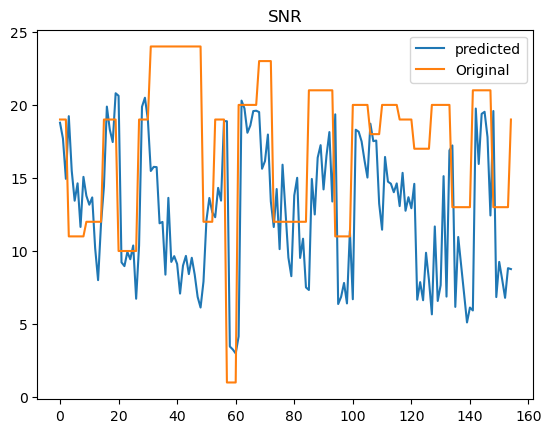

Time: 10.3828125
CNNLSTM training time: 11.78 seconds

VAR
RMSE MOS: 0.01715406721711757
MAE MOS: 0.014910358509048373
MAPE MOS: 0.3414121215001812
Inv_yhat shape == (155, 6)
Test original shape == (167, 6)


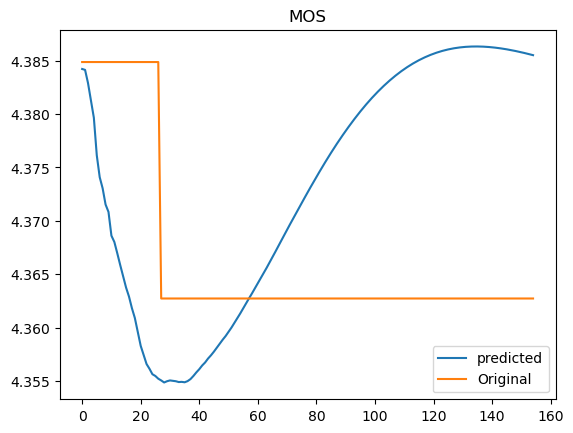

RMSE BW: 14.016241720173868
MAE BW: 6.325292087450837
MAPE BW: 8.783386439199086
Inv_yhat shape == (155, 6)
Test original shape == (167, 6)


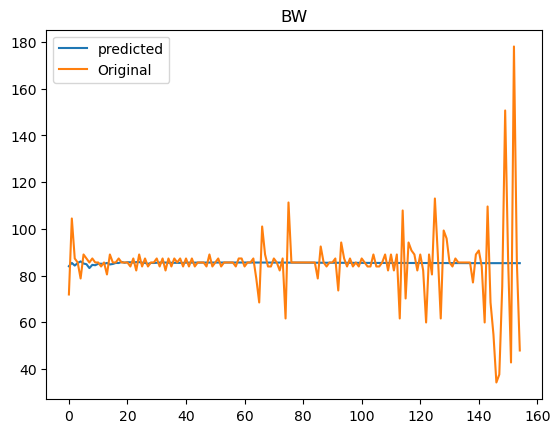

RMSE RTT: 170.41895413661996
MAE RTT: 53.725211490567766
MAPE RTT: 16.202146676900686
Inv_yhat shape == (155, 6)
Test original shape == (167, 6)


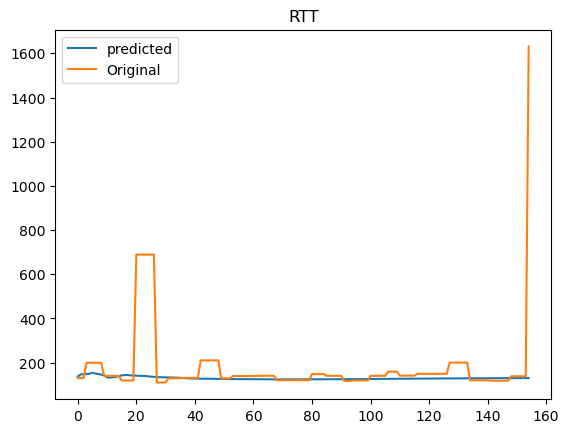

RMSE Jitter: 32.51789745702626
MAE Jitter: 14.637896227647342
MAPE Jitter: 13.478233031273007
Inv_yhat shape == (155, 6)
Test original shape == (167, 6)


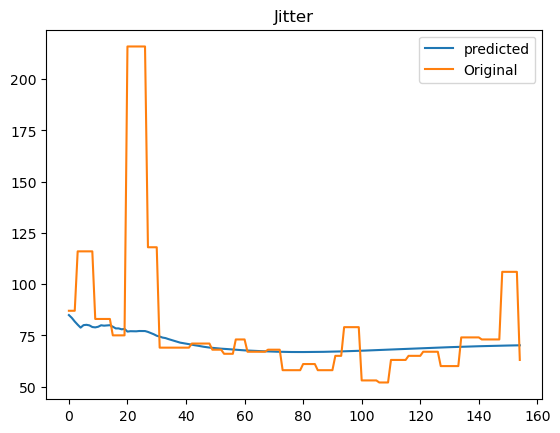

RMSE Buffer: 48.740857708437986
MAE Buffer: 37.7002475641242
MAPE Buffer: 31.30492675559108
Inv_yhat shape == (155, 6)
Test original shape == (167, 6)


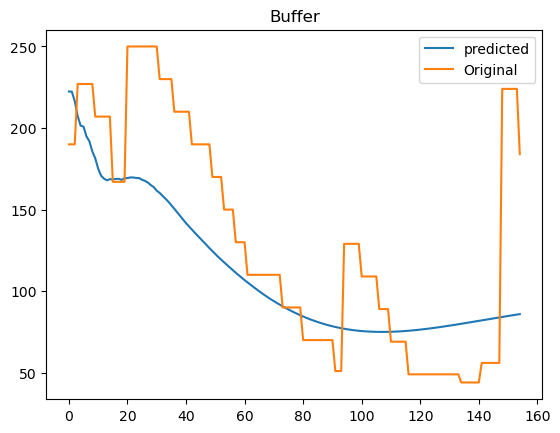

RMSE SNR: 11.411721847366792
MAE SNR: 10.302754897472576
MAPE SNR: 68.54243978447973
Inv_yhat shape == (155, 6)
Test original shape == (167, 6)


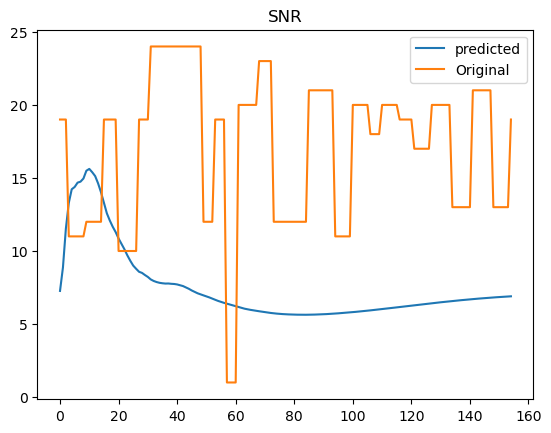

Time: 0.00999903678894043
VAR training time: 1.85 seconds


In [13]:
 #Routine #2 to produce forecast
 # Parameters you can set
filename="mob_g722.txt"
methods={"LSTM":False, "CNNLSTM": True, "CNN": False, "GRU": False, "RNN": False, "MLP":False ,
         "XGBoost": False, "Random Forest": False, "VAR": True , "MLP Regressor": False}
parameters={"lstm_epochs":30, "lstm_units":30,
            "lstm_nested_epochs":30, "lstm_nested_units":10,
            "cnn_epochs": 30, "cnn_filters": 30, "cnn_filter_size": 3,
            "gru_epochs":30, "gru_units":30,
            "rnn_epochs":30, "rnn_units":20,
            "MLP_epochs": 30, "MLP_hidden":30,
            "RF_estimators":30,
            "GB_estimators":30,
           "hybrid_cnn_lstm_epochs": 30,  # Training epochs for the hybrid model
            "hybrid_cnn_filters": 64,     # Number of filters in CNN for hybrid model
           "hybrid_cnn_filter_size": 3,   # Filter size in CNN for hybrid model
           "hybrid_lstm_units": 10,       # Number of LSTM units in the hybrid model
          "hybrid_cnn_filters1": 128       
}


run(filename, n_past=12, n_fut=1, perc_train=0.7, parameters=parameters,
    methods=methods, verbose=True, debug=False, cols_to_predict=[0,1,2,3,4,5])


In [12]:
#### Routine #1 to produce forecast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import keras

import tensorflow as tf
from tensorflow import keras
tf.get_logger().setLevel('ERROR')

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard, Callback
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN, Conv1D, Conv2D, Flatten, TimeDistributed
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from IPython.display import clear_output
from statsmodels.tsa.api import VAR

column_map={0:"MOS", 1:"BW", 2:"RTT", 3:"Jitter", 4:"Buffer", 5:"SNR"}

#Original Setting
def run(filename, cols_to_predict=[0,1], n_past=15, n_fut=1, perc_train=0.75,verbose=False, debug=False,
        parameters={"lstm_epochs":30, "lstm_units":30,"lstm_nested_epochs":30, "lstm_nested_units":10,
            "cnn_epochs": 30, "cnn_filters": 30, "cnn_filter_size": 3, "gru_epochs":30, "gru_units":30,
            "rnn_epochs":30, "rnn_units":30, "MLP_epochs": 30, "MLP_hidden":2,
            "RF_estimators":30, "GB_estimators":30, "hybrid_cnn_lstm_epochs": 15,  # Training epochs for the hybrid model
            "hybrid_cnn_filters": 64,     # Number of filters in CNN for hybrid model
           "hybrid_cnn_filter_size": 3,   # Filter size in CNN for hybrid model
           "hybrid_lstm_units": 30,       # Number of LSTM units in the hybrid mode 
         "hybrid_cnn_filters1": 128     
},
        methods={"LSTM":True, "CNNLSTM": True, "CNN": False, "GRU": False, "RNN": False, "MLP": True,
         "XGBoost": False, "Random Forest": False, "MLP Regressor": False, "VAR": True}):

  data_3d, data_2d, data_linear, data_var, y_test_original, train_original, scaler = read_data(filename, cols_to_predict, n_past, n_fut, perc_train=perc_train, verbose=verbose, debug=debug)
  X_train, y_train = data_3d["X_train"], data_3d["y_train"]
  X_test, y_test = data_3d["X_test"], data_3d["y_test"]

 # Dictionary to store elapsed time for each method
  elapsed_times = {}

  print("\n\n############################## RESULTS ##########################")
  if methods["LSTM"]:
    print("\nLSTM")
    start_time = time.time()
    model, training_time = train_LSTM(X_train, y_train, parameters["lstm_epochs"], parameters["lstm_units"], n_past, cols_to_predict)
    yhat = model.predict(X_test)
    elaborate_results(yhat, y_test_original, n_past, n_fut, scaler, cols_to_predict, training_time, "lstm", verbose,debug=debug)
    elapsed_times["LSTM"] = time.time() - start_time  # Store elapsed time
    print(f"LSTM training time: {elapsed_times['LSTM']:.2f} seconds")


  if methods["GRU"]:
    print("\nGRU")
    start_time = time.time()
    model, training_time = train_GRU(X_train, y_train, parameters["gru_epochs"], parameters["gru_units"],
                                     n_past, cols_to_predict)
    yhat = model.predict(X_test)
    elaborate_results(yhat, y_test_original, n_past, n_fut, scaler, cols_to_predict, training_time, "gru", verbose,debug=debug)
    elapsed_times["GRU"] = time.time() - start_time  # Store elapsed time
    print(f"GRU training time: {elapsed_times['GRU']:.2f} seconds")

  if methods["RNN"]:
    print("\nRNN")
    start_time = time.time()
    model, training_time = train_RNN(X_train, y_train, parameters["rnn_epochs"], parameters["rnn_units"],
                                     n_past, cols_to_predict)
    yhat = model.predict(X_test)
    elaborate_results(yhat, y_test_original, n_past, n_fut, scaler, cols_to_predict, training_time, "rnn", verbose,debug=debug)
    elapsed_times["RNN"] = time.time() - start_time  # Store elapsed time
    print(f"RNN training time: {elapsed_times['RNN']:.2f} seconds")



  X_train, y_train = data_2d["X_train"], data_2d["y_train"]
  X_test, y_test = data_2d["X_test"], data_2d["y_test"]

  if methods["CNN"]:
    print("\nCNN")
    start_time = time.time()
    model, training_time = train_CNN(X_train, y_train, parameters["cnn_epochs"], parameters["cnn_filters"], parameters["cnn_filter_size"],
                                             n_past, cols_to_predict, parameters["lstm_units"])
    yhat = model.predict(X_test)
    elaborate_results(yhat, y_test_original, n_past, n_fut, scaler, cols_to_predict, training_time, "cnn", verbose,debug=debug)
    elapsed_times["CNN"] = time.time() - start_time  # Store elapsed time
    print(f"CNN training time: {elapsed_times['CNN']:.2f} seconds")



  X_train, y_train = data_linear["X_train"], data_linear["y_train"]
  X_test, y_test = data_linear["X_test"], data_linear["y_test"]

  if methods["MLP"]:
    print("\nMLP")
    start_time = time.time()
    model, training_time = train_MLP(X_train, y_train, parameters["MLP_epochs"], parameters["MLP_hidden"],
                                     n_past, cols_to_predict)
    yhat = model.predict(X_test)
    elaborate_results(yhat, y_test_original, n_past, n_fut, scaler, cols_to_predict, training_time, "mlp", verbose,debug=debug)
    elapsed_times["MLP"] = time.time() - start_time  # Store elapsed time
    print(f"MLP training time: {elapsed_times['MLP']:.2f} seconds")

  if methods["XGBoost"]:
    print("\nXGBoost")
    start_time = time.time()
    yhat, training_time = train_test_gradient_boosting(X_train, y_train, X_test, parameters["GB_estimators"],
                                                       cols_to_predict)
    elaborate_results(yhat, y_test_original, n_past, n_fut, scaler, cols_to_predict, training_time, "gb", verbose,debug=debug)

    elapsed_times["XGBoost"] = time.time() - start_time  # Store elapsed time
    print(f"XGBoost training time: {elapsed_times['XGBoost']:.2f} seconds")


  if methods["Random Forest"]:
    print("\nRandom Forest")
    start_time = time.time()
    model, training_time = train_RandomForest(X_train, y_train, parameters["RF_estimators"])
    yhat = model.predict(X_test)
    yhat = yhat.reshape((len(yhat),len(cols_to_predict)))
    yhat = elaborate_results(yhat, y_test_original, n_past, n_fut, scaler, cols_to_predict, training_time, "rf", verbose,debug=debug)
    plot_combine(train_original, y_test_original,yhat,n_past,cols_to_predict)
    elapsed_times["Random Forest"] = time.time() - start_time  # Store elapsed time
    print(f"Random Forest training time: {elapsed_times['Random Forest']:.2f} seconds")

  if methods["MLP Regressor"]:
    print("\nMLP Regressor")
    start_time = time.time()
    model, training_time = train_MLP_regr(X_train, y_train, parameters["MLP_r_epochs"], parameters["MLP_r_hidden"])
    yhat = model.predict(X_test)
    yhat = yhat.reshape((len(yhat),len(cols_to_predict)))
    elaborate_results(yhat, y_test_original, n_past, n_fut, scaler, cols_to_predict, training_time, "mlp_regr", verbose,debug=debug)
    elapsed_times["MLP Regressor"] = time.time() - start_time  # Store elapsed time
    print(f"MLP Regressor training time: {elapsed_times['MLP Regressor']:.2f} seconds")

  if methods["CNNLSTM"]:
    print("\nCNNLSTM")
    start_time = time.time()
    yhat, training_time = train_test_CNNLSTM(X_train, y_train, X_test, parameters["hybrid_cnn_lstm_epochs"], cols_to_predict,)
    elaborate_results(yhat, y_test_original, n_past, n_fut, scaler, cols_to_predict, training_time, "CNNLSTM", verbose,debug=debug)
    elapsed_times["CNNLSTM"] = time.time() - start_time   # Store elapsed time
    print(f"CNNLSTM training time: {elapsed_times['CNNLSTM']:.2f} seconds",)

  if methods["VAR"]:
    print("\nVAR")
    start_time = time.time()
    X_train_var, X_test_var = data_var["X_train"], data_var["X_test"]
    model, training_time = train_VAR(X_train_var, n_past)
    yhat = model.forecast(y=X_train_var, steps=X_test_var.shape[0]-n_past)
    yhat=elaborate_results(yhat, y_test_original, n_past, n_fut, scaler, cols_to_predict, training_time, "var", verbose,debug=debug)
    elapsed_times["VAR"] = time.time() - start_time  # Store elapsed time
    print(f"VAR training time: {elapsed_times['VAR']:.2f} seconds")


def plot_combine(X_train, X_test, yhat, n_past, cols_to_predict):
  for i in range(len(cols_to_predict)):
    plt.title(column_map[cols_to_predict[i]])
    plt.plot([k+X_train.shape[0]+n_past-330 for k in range(len(yhat))], yhat[:,i], label="yhat")
    plt.plot(np.concatenate((X_train[330:,i], X_test[:,i]),axis=0), label="true")
    plt.axvline(x=X_train.shape[0]-330,color='k', linestyle=":")
    plt.axvline(x=X_train.shape[0]+n_past-330,color='k', linestyle=":")
    plt.legend()
    plt.show()


class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

#Function series_to_supervised adapted from Jason Brownlee blog
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('%s(t-%d)' % (column_map[j], i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('%s(t)' % (column_map[j])) for j in range(n_vars)]
    else:
      names += [('%s(t+%d)' % (column_map[j], i)) for j in range(n_vars)]
	# put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg

def read_data(filename, cols_to_predict, n_past, n_fut=1, perc_train=0.85, verbose=False, debug=True):
  data = pd.read_csv(filename).iloc[:, 1:7].astype(float)

  if verbose:
    cols=list(data)[1:7]
    plt.figure()
    values = data.values
    for i in range(0, len(cols)):
      plt.subplot(len(cols), 1, i+1)
      plt.plot(values[:, i])
      plt.title(data.columns[i], y=0.5, loc='right')
    plt.show()

  #Reshape as a matrix
  data=data.to_numpy()
  print ('Initial shape == {}'.format(data.shape))

  train_before = data[:int(perc_train*data.shape[0]), :]
  test_before = data[int(perc_train*data.shape[0]):, :]
  print ('Train shape == {}'.format(train_before.shape))
  print ('Test shape == {}'.format(test_before.shape))

  if debug:
    print("Train data=", train_before)
  test_original = test_before
  train_original = train_before
  #normalize features
  #scaler=None
  scaler = MinMaxScaler(feature_range=(0, 1))
  train = scaler.fit_transform(train_before)
  test = scaler.transform(test_before)


  data_var={"X_train": train, "X_test": test}

  reframed_train = series_to_supervised(train, n_past, n_fut)
  reframed_test = series_to_supervised(test, n_past, n_fut)

  # if you would not use all the columns for prediction
  cols_to_drop = [i for i in range(6) if i not in cols_to_predict ]
  reframed_train.drop(reframed_train.columns[[n_past*6+i for i in cols_to_drop]], axis=1, inplace=True)
  reframed_test.drop(reframed_test.columns[[n_past*6+i for i in cols_to_drop]], axis=1, inplace=True)
  print ('Reframed Train shape == {}'.format(reframed_train.shape))
  print ('Reframed Test shape == {}'.format(reframed_test.shape))

  if verbose:
    print(reframed_train.head())

  train = reframed_train.values
  test = reframed_test.values


  #train dovrebbe andare fino a n_past, test partire da n_past
  X_train, y_train = train[:, :n_past * 6], train[:, -len(cols_to_predict):]
  X_test, y_test = test[:, :n_past*6], test[:, -len(cols_to_predict):]
  data_linear={"X_train": X_train, "y_train": y_train, "X_test": X_test, "y_test": y_test}

  print ('X_train_linear shape == {}'.format(X_train.shape))
  print ('y_train_linear shape == {}'.format(y_train.shape))

  print ('X_test_linear shape == {}'.format(X_test.shape))
  print ('y_test_linear shape == {}'.format(y_test.shape))

  X_train_3d = X_train.reshape((X_train.shape[0], n_past, 6))
  X_test_3d = X_test.reshape((X_test.shape[0], n_past, 6))
  data_3d={"X_train": X_train_3d, "y_train": y_train, "X_test": X_test_3d, "y_test": y_test}

  print ('X_train_3d shape == {}'.format(X_train_3d.shape))
  print ('y_train_3d shape == {}'.format(y_train.shape))

  X_train_2d = X_train.reshape((X_train.shape[0], n_past, 6, 1))
  X_test_2d = X_test.reshape((X_test.shape[0], n_past, 6, 1))
  data_2d={"X_train": X_train_2d, "y_train": y_train, "X_test": X_test_2d, "y_test": y_test}

  print ('X_train_2d shape == {}'.format(X_train_2d.shape))
  print ('y_train_2d shape == {}'.format(y_train.shape))

  return data_3d, data_2d, data_linear, data_var, test_original, train_original, scaler

def get_callbacks():
  plot_losses = PlotLosses()
  es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10)
  rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)
  mcp = ModelCheckpoint(filepath='weights.keras', monitor='val_loss', save_best_only=True)
  return [es, rlr, mcp]

def train_LSTM(X_train, y_train, epochs, lstm_units, n_past, cols_to_predict):
  start = time.time()

  model = Sequential()
  model.add(LSTM(units=lstm_units, input_shape=(n_past, 6)))
  model.add(Dropout(0.25))
  model.add(Dense(units=len(cols_to_predict)))
  model.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate=0.1))
  model.fit(X_train, y_train, epochs = epochs, shuffle=False, verbose = 0,
                    callbacks=get_callbacks(), validation_split=0.2, batch_size=32)
  return model, time.time() - start



def train_CNN(X_train, y_train, epochs, cnn_filters, cnn_filter_size, n_past, cols_to_predict, lstm_units):
  start = time.time()
  model = Sequential()
  model.add(Conv2D(filters=cnn_filters, kernel_size=(1, len(cols_to_predict)), activation='relu', input_shape=(n_past, len(cols_to_predict), 1)))
  #model.add(Conv1D(filters=cnn_filters, kernel_size=(len(cols_to_predict)), activation='tanh', input_shape=(n_past, len(cols_to_predict), 1)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(units=len(cols_to_predict)))
  model.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate=0.01))
  model.fit(X_train, y_train, epochs = epochs, shuffle=False, verbose = 0,
                    callbacks=get_callbacks(), validation_split=0.2, batch_size=32)
  return model, time.time() - start

def train_test_CNNLSTM(X_train, y_train, X_test, estimators, cols_to_predict):
  start = time.time()
  time.sleep(10)
  regr = XGBRegressor(n_estimators = estimators, random_state=1).fit(X_train, y_train[:,0])
  yhat = regr.predict(X_test)
  yhat = yhat.reshape((len(yhat)),1)
  for i in range(1, len(cols_to_predict)):
    regr = XGBRegressor(n_estimators = estimators, random_state=1).fit(X_train, y_train[:,i])
    pred = regr.predict(X_test)
    yhat = np.concatenate([yhat, pred.reshape((len(pred)),1)], axis=1)
  return yhat, time.time() - start


def train_GRU(X_train, y_train, epochs, gru_units, n_past, cols_to_predict):
  start = time.time()

  model = Sequential()
  model.add(GRU(units=gru_units, input_shape=(n_past, 6)))
  model.add(Dropout(0.25))
  model.add(Dense(units=len(cols_to_predict)))
  model.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate=0.1))
  model.fit(X_train, y_train, epochs = epochs, shuffle=False, verbose = 0,
                    callbacks=get_callbacks(), validation_split=0.2, batch_size=32)
  return model, time.time() - start
    
def train_RNN(X_train, y_train, epochs, rnn_units, n_past, cols_to_predict):
  start = time.time()

  model = Sequential()
  model.add(SimpleRNN(units=rnn_units, input_shape=(n_past, 6)))
  model.add(Dropout(0.25))
  model.add(Dense(units=len(cols_to_predict)))
  model.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate=0.1))
  model.fit(X_train, y_train, epochs = epochs, shuffle=False, verbose = 0,
                    callbacks=get_callbacks(), validation_split=0.2, batch_size=32)
  return model, time.time() - start


def train_MLP(X_train, y_train, epochs, dense_units, n_past, cols_to_predict):
  start = time.time()

  model = Sequential()
  model.add(Dense(units = dense_units, input_shape=(n_past*6,)))
  model.add(Dropout(0.25))
  model.add(Dense(units=len(cols_to_predict)))
  model.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate=0.1))
  model.fit(X_train, y_train, epochs = epochs, shuffle=False, verbose = 0,
                    callbacks=get_callbacks(), validation_split=0.2, batch_size=32)
  return model, time.time() - start   

def train_RandomForest(X_train, y_train, estimators):
  start = time.time()
  regr = RandomForestRegressor(max_depth=10, n_estimators = 30, random_state=0).fit(X_train, y_train)
  return regr, time.time() - start
    
def train_MLP_regr(X_train, y_train, epochs, hidden):
  start = time.time()
  regr = MLPRegressor(random_state=1, hidden_layer_sizes = hidden, max_iter=epochs).fit(X_train, y_train)
  return regr, time.time() - start
    
def train_test_gradient_boosting(X_train, y_train, X_test, estimators, cols_to_predict):
  start = time.time()

  regr = XGBRegressor(n_estimators = estimators, random_state=1).fit(X_train, y_train[:,0])
  yhat = regr.predict(X_test)
  yhat = yhat.reshape((len(yhat)),1)
  for i in range(1, len(cols_to_predict)):
    regr = XGBRegressor(n_estimators = estimators, random_state=1).fit(X_train, y_train[:,i])
    pred = regr.predict(X_test)
    yhat = np.concatenate([yhat, pred.reshape((len(pred)),1)], axis=1)
  return yhat, time.time() - start

def train_VAR(X_train, n_past):
  start = time.time()
  model = VAR(X_train)
  results = model.fit(n_past)
  return results, time.time() - start

def train_CNN_LSTM(X_train, y_train, hybrid_cnn_lstm_pochs, hybrid_cnn_filters, hybrid_cnn_filter_size, 
                   hybrid_lstm_units,  n_past, cols_to_predict):
    """
    Train a Hybrid CNN-LSTM model for time series forecasting.

    Args:
        X_train (array): Input training data.
        y_train (array): Output training data.
        epochs (int): Number of training epochs.
        hybrid_cnn_filters (int): Number of filters for the CNN layer.
        hybrid_cnn_filter_size (int): Kernel size for the CNN layer.
        hybrid_lstm_units (int): Number of LSTM units.
        n_past (int): Number of past timesteps used as input.
        cols_to_predict (list): List of columns being predicted.

    Returns:
        model: Trained Hybrid CNN-LSTM model.
        float: Time taken to train the model.
    """

    start = time.time()

    # Define the CNN-LSTM model
    model = Sequential()

    # 1. CNN Layer 1
    model.add(Conv1D(filters=hybrid_cnn_filters,
                     kernel_size=hybrid_cnn_filter_size,
                     activation='relu',
                     input_shape=(n_past, len(cols_to_predict))))
    
    # 2. Pooling Layer
    model.add(MaxPooling1D(pool_size=2))

    # 3. CNN Layer 2
    model.add(Conv1D(filters=hybrid_cnn_filters1,
                     kernel_size=hybrid_cnn_filter_size,
                     activation='relu'))
    
    # 4. Flatten Layer
    model.add(Flatten())

    # 5. Reshape Layer
    model.add(Reshape((n_past - 2 * (hybrid_cnn_filter_size - 1), hybrid_cnn_filters1)))

    # 6. LSTM Layer
    model.add(LSTM(units=hybrid_lstm_units, activation='tanh', return_sequences=False))
    model.add(Dropout(0.25))

    # 7. Dense Layer (Output)
    model.add(Dense(units=len(cols_to_predict), activation='linear'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train,
              epochs=epochs,
              shuffle=False,
              verbose=1,
              validation_split=0.2,
              )

    # Return trained model and elapsed time
    return model, time.time() - start

def elaborate_results(yhat, y_test_original, n_past, n_fut, scaler, cols_to_predict, training_time, method, verbose, debug=False):
  ### De-scaling
  Y_temp=np.zeros((yhat.shape[0],6))
  for i in range(len(cols_to_predict)):
    Y_temp[:,cols_to_predict[i]] = yhat[:,i]
  if debug:
    print('Y temp shape == {}'.format(Y_temp.shape))
  if scaler == None:
    inv_yhat = Y_temp
  else:
    inv_yhat = scaler.inverse_transform(Y_temp)
  inv_yhat = inv_yhat[:,cols_to_predict]
  if debug:
    print('Inv_yhat shape == {}'.format(inv_yhat.shape))
    print('Test original shape == {}'.format(y_test_original.shape))
  for i in range(len(cols_to_predict)):
    rmse = math.sqrt(mean_squared_error(y_test_original[n_past+n_fut-1:,i], inv_yhat[:,i]))
    mae=mean_absolute_error(y_test_original[n_past+n_fut-1:,i], inv_yhat[:,i])
    mape=mean_absolute_percentage_error(y_test_original[n_past+n_fut-1:,i], inv_yhat[:,i])*100
    np.savetxt(f'{filename}_{method}.txt', np.column_stack([(y_test_original[n_past:,0]),(inv_yhat[:,0]),(y_test_original[n_past:,1]),(inv_yhat[:,1]),(y_test_original[n_past:,2]),(inv_yhat[:,2]),(y_test_original[n_past:,3]),(inv_yhat[:,3]), (y_test_original[n_past:,4]),(inv_yhat[:,4]), (y_test_original[n_past:,5]),(inv_yhat[:,5])  ]), fmt='%1.6f')
    print('RMSE {}: {}'.format(column_map[cols_to_predict[i]], rmse))
    print('MAE {}: {}'.format(column_map[cols_to_predict[i]], mae))
    print('MAPE {}: {}'.format(column_map[cols_to_predict[i]], mape))
    print('Inv_yhat shape == {}'.format(inv_yhat.shape))
    print('Test original shape == {}'.format(y_test_original.shape))
    #print("y:", y_test_original[n_past:,i])
    #print("y_hat:", inv_yhat[:,i])
    if verbose:
      plt.title(column_map[cols_to_predict[i]])
      plt.plot(inv_yhat[:,i], label="predicted")
      plt.plot(y_test_original[n_past:,cols_to_predict[i]], label="Original")
      plt.legend()
      plt.show()
      if debug:
        print("y:", y_test_original[n_past:,i])
        print("y_hat:", inv_yhat[:,i])
  print(f'Time: {training_time}')
  return inv_yhat





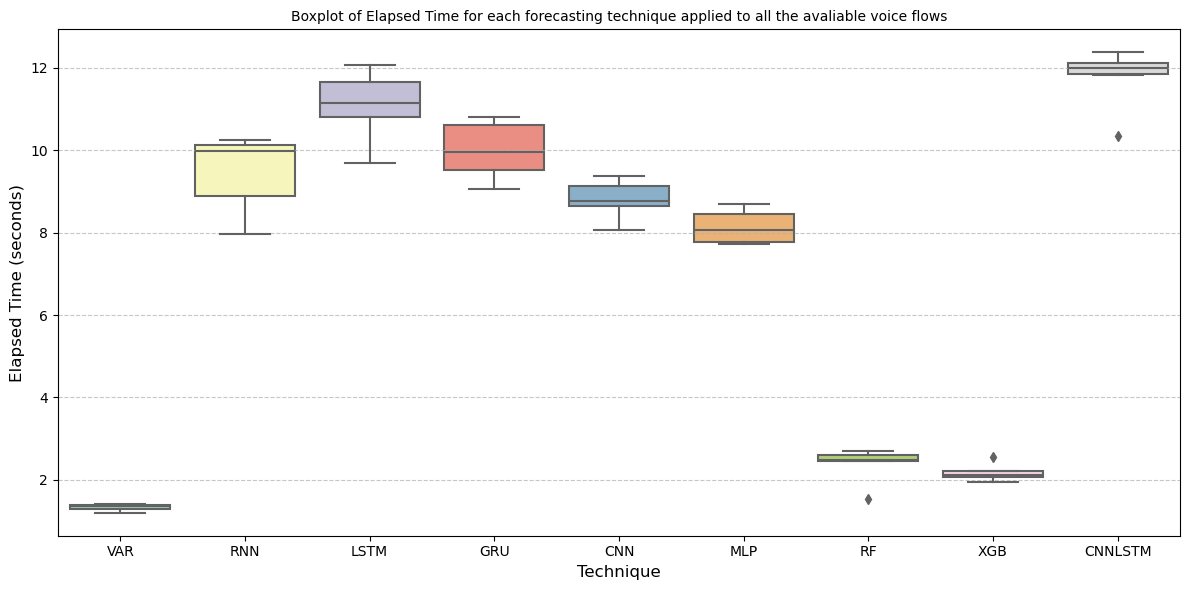

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from elapsedtimes.txt
file_path = 'elapsedtimes.txt'  # Update with the correct path if needed
data = pd.read_csv(file_path, delim_whitespace=True)

# Clean and convert the 'Elapsed' column to numeric
data['Elapsed'] = pd.to_numeric(data['Elapsed'], errors='coerce')

# Check for invalid rows and remove them
data = data.dropna(subset=['Elapsed'])

# Boxplot with custom figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for 'Elapsed' grouped by 'Technique'
sns.boxplot(data=data, x="Technique", y="Elapsed", palette="Set3")

# Adding titles and labels for the boxplot
plt.title('Boxplot of Elapsed Time for each forecasting technique applied to all the avaliable voice flows', fontsize=10)
plt.xlabel('Technique', fontsize=12)
plt.ylabel('Elapsed Time (seconds)', fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the boxplot
plt.savefig('elapsed times of  box plot', dpi=300, bbox_inches='tight')
plt.show()


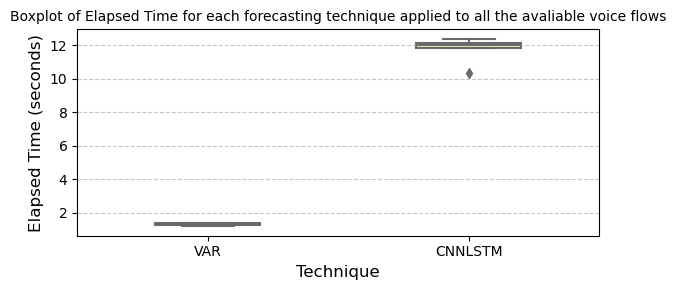

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from elapsedtimes.txt
file_path = 'elapsed var and hybrid.txt'  # Update with the correct path if needed
data = pd.read_csv(file_path, delim_whitespace=True)

# Clean and convert the 'Elapsed' column to numeric
data['Elapsed'] = pd.to_numeric(data['Elapsed'], errors='coerce')

# Check for invalid rows and remove them
data = data.dropna(subset=['Elapsed'])

# Boxplot with custom figure size
plt.figure(figsize=(6,3))

# Create a boxplot for 'Elapsed' grouped by 'Technique'
sns.boxplot(data=data, x="Technique", y="Elapsed", palette="Set3", width=0.4)

# Adding titles and labels for the boxplot
plt.title('Boxplot of Elapsed Time for each forecasting technique applied to all the avaliable voice flows', fontsize=10)
plt.xlabel('Technique', fontsize=12)
plt.ylabel('Elapsed Time (seconds)', fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the boxplot
plt.savefig('elapsed times of  box plot', dpi=300, bbox_inches='tight')
plt.show()
